In [243]:
import pandas as pd
import plotly.express as px

# Carregar o dataset
df_map1 = pd.read_csv('map1.csv')

# Remover entradas com "United States" na coluna 'Country'
df_map1 = df_map1[df_map1['Country'].str.strip() != 'United States']

# Criar o gráfico de dispersão geográfico
fig = px.scatter_geo(df_map1, locations='State', locationmode='USA-states', color='Medium Salary',
                     hover_name='State', size='Medium Salary', projection='albers usa',
                     title='Salary by Location', color_continuous_scale='Viridis')

fig.update_layout(geo=dict(scope='usa'))
fig.show()

In [123]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Carregar o dataset
df_map1 = pd.read_csv('map1.csv')

# Remover entradas com "United States" na coluna 'Country'
df_map1 = df_map1[df_map1['Country'].str.strip() != 'United States']

# Inicializar o aplicativo Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Salary by Location"),
    dcc.Graph(id='geo-scatter-plot')
])

@app.callback(
    Output('geo-scatter-plot', 'figure'),
    Input('geo-scatter-plot', 'id')  # Apenas um input fictício para ativar o callback
)
def update_graph(_):
    fig = px.scatter_geo(df_map1, locations='State', locationmode='USA-states', color='Medium Salary',
                         hover_name='State', size='Medium Salary', projection='albers usa',
                         title='Salary by Location', color_continuous_scale='Viridis')

    fig.update_layout(geo=dict(scope='usa'))
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[71], line 164, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
    162 predictive_model_fig = create_scatter_chart(filtered_df)  # Placeholder for predictive model results
    163 map_fig = create_map_chart(filtered_df)
--> 164 topic_modeling_img = create_wordcloud()  # Nuvem de palavras para modelagem de tópicos
    166 return bar_fig, box_fig, predictive_model_fig, map_fig, 'data:image/png;base64,{}'.format(topic_modeling_img)

TypeError: create_wordcloud() missing 1 required positional argument: 'filtered_df'



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[71], line 164, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
    162 predictive_model_fig = create_scatter_chart(filtered_df)  # Placeholder for predictive model results
    163 map_fig = create_map_chart(filtered_df)
--> 164 topic_modeling_img = create_wordcloud()  # Nuvem de palavras para modelagem de tópicos
    166 return bar_fig, box_fig, predictive_model_fig, map_fig, 'data:image/png;base64,{}'.format(topic_modeling_img)

TypeError: create_wordcloud() missing 1 required positional argument: 'filtered_df'



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[71], line 164, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
    162 predictive_model_fig = create_scatter_chart(filtered_df)  # Placeholder for predictive model results
    163 map_fig = create_map_chart(filtered_df)
--> 164 topic_modeling_img = create_wordcloud()  # Nuvem de palavras para modelagem de tópicos
    166 return bar_fig, box_fig, predictive_model_fig, map_fig, 'data:image/png;base64,{}'.format(topic_modeling_img)

TypeError: create_wordcloud() missing 1 required positional argument: 'filtered_df'



In [124]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Carregar o dataset
df_map1 = pd.read_csv('map1.csv')

# Remover entradas com "United States" na coluna 'Country'
df_map1 = df_map1[df_map1['Country'].str.strip() != 'United States']

# Inicializar o aplicativo Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Salary by Location"),
    dcc.Dropdown(id='category_dropdown', options=[
        {'label': category, 'value': category} for category in df_map1['Category'].unique()
    ], placeholder="Select Category"),
    dcc.Dropdown(id='industry_dropdown', options=[
        {'label': industry, 'value': industry} for industry in df_map1['Industry'].unique()
    ], placeholder="Select Industry"),
    dcc.Dropdown(id='experience_dropdown', options=[
        {'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()
    ], placeholder="Select Experience Level"),
    dcc.Graph(id='geo-scatter-plot'),
    html.Div(id='wordcloud-output', style={'textAlign': 'center'})
])

@app.callback(
    [Output('geo-scatter-plot', 'figure'),
     Output('wordcloud-output', 'children')],
    [Input('category_dropdown', 'value'),
     Input('industry_dropdown', 'value'),
     Input('experience_dropdown', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]
    
    # Criar o gráfico de dispersão geográfico
    fig = px.scatter_geo(filtered_df, locations='State', locationmode='USA-states', color='Medium Salary',
                         hover_name='State', size='Medium Salary', projection='albers usa',
                         title='Salary by Location', color_continuous_scale='Viridis')

    fig.update_layout(geo=dict(scope='usa'))
    
    # Criar a nuvem de palavras
    wordcloud_img = create_wordcloud(filtered_df)
    wordcloud_img_encoded = f'data:image/png;base64,{wordcloud_img}'
    
    wordcloud_div = html.Img(src=wordcloud_img_encoded, style={'height': '400px'})
    
    return fig, wordcloud_div

def create_wordcloud(filtered_df):
    if filtered_df.empty:
        return ""
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Salvar a imagem em um objeto BytesIO
    buffer = BytesIO()
    wordcloud.to_image().save(buffer, format='PNG')
    buffer.seek(0)
    
    # Codificar a imagem em base64
    img_str = base64.b64encode(buffer.read()).decode('utf-8')
    
    return img_str

if __name__ == '__main__':
    app.run_server(debug=True)

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[71], line 164, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
    162 predictive_model_fig = create_scatter_chart(filtered_df)  # Placeholder for predictive model results
    163 map_fig = create_map_chart(filtered_df)
--> 164 topic_modeling_img = create_wordcloud()  # Nuvem de palavras para modelagem de tópicos
    166 return bar_fig, box_fig, predictive_model_fig, map_fig, 'data:image/png;base64,{}'.format(topic_modeling_img)

TypeError: create_wordcloud() missing 1 required positional argument: 'filtered_df'



In [125]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', scope='usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Configurar o layout do Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category_input',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry_input',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience_input',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar_chart'),
    dcc.Graph(id='scatter_chart'),
    dcc.Graph(id='map_chart'),
    html.Img(id='wordcloud_img')
])

# Callbacks para atualizar os gráficos
@app.callback(
    [Output('bar_chart', 'figure'),
     Output('scatter_chart', 'figure'),
     Output('map_chart', 'figure'),
     Output('wordcloud_img', 'src')],
    [Input('category_input', 'value'),
     Input('industry_input', 'value'),
     Input('experience_input', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if filtered_df.empty:
        filtered_df = df_map1  # fallback to original data if the filter results in an empty dataframe

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_scatter_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[125], line 86, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
     84 scatter_fig = create_scatter_chart(filtered_df)
     85 map_fig = create_scatter_chart(filtered_df)
---> 86 wordcloud_img = create_wordcloud(filtered_df)
        filtered_df =        Experience Level  Medium Salary State  \
0      Mid-Senior level          10400    CA   
1             Associate           6875    NY   
2           Entry level           7500    FL   
3             Associate           2960    VA   
4      Mid-Senior level          14166    CA   
...                 ...            ...   ...   
19697  Mid-Senior level          13125    CA   
19698  Mid-Senior level           6400    CA   
19699  Mid-Senior level           6400    CA   
19700  Mid-Senior level          13125    CA   
19701  Mi

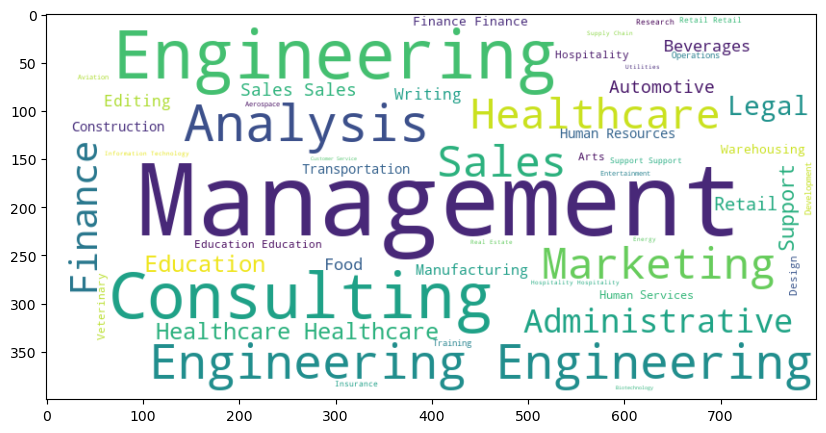

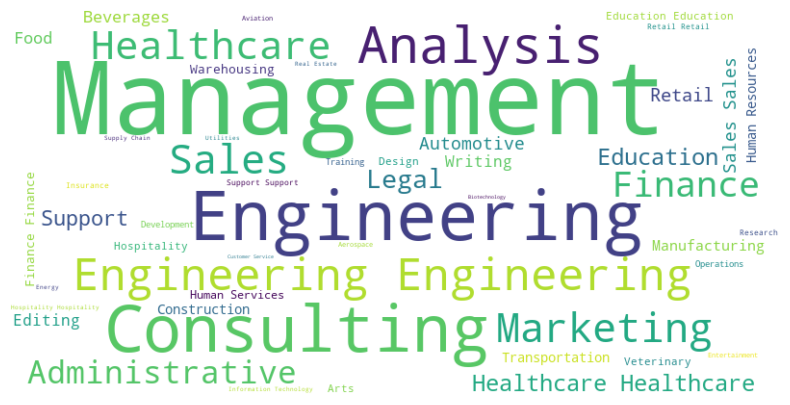

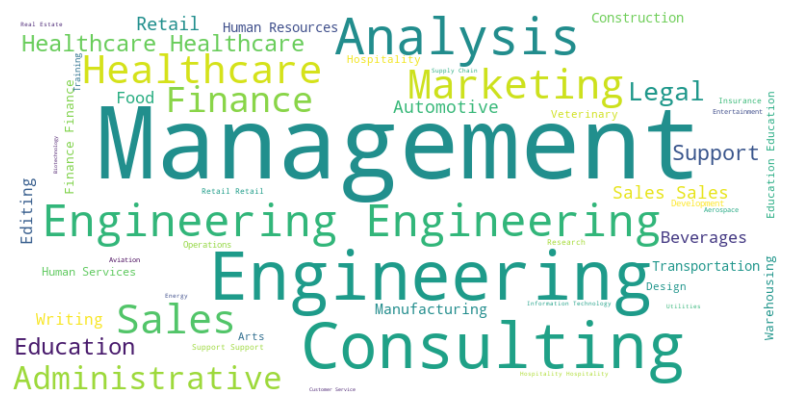

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[126], line 86, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
     84 scatter_fig = create_scatter_chart(filtered_df)
     85 map_fig = create_scatter_chart(filtered_df)
---> 86 wordcloud_img = create_wordcloud(filtered_df)
        filtered_df =        Experience Level  Medium Salary State  \
0      Mid-Senior level          10400    CA   
1             Associate           6875    NY   
2           Entry level           7500    FL   
3             Associate           2960    VA   
4      Mid-Senior level          14166    CA   
...                 ...            ...   ...   
19697  Mid-Senior level          13125    CA   
19698  Mid-Senior level           6400    CA   
19699  Mid-Senior level           6400    CA   
19700  Mid-Senior level          13125    CA   
19701  Mi

In [126]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', scope='usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Configurar o layout do Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category_input',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry_input',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience_input',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar_chart'),
    dcc.Graph(id='scatter_chart'),
    dcc.Graph(id='map_chart'),
    html.Img(id='wordcloud_img')
])

# Callbacks para atualizar os gráficos
@app.callback(
    [Output('bar_chart', 'figure'),
     Output('scatter_chart', 'figure'),
     Output('map_chart', 'figure'),
     Output('wordcloud_img', 'src')],
    [Input('category_input', 'value'),
     Input('industry_input', 'value'),
     Input('experience_input', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if filtered_df.empty:
        filtered_df = df_map1  # fallback to original data if the filter results in an empty dataframe

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_scatter_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

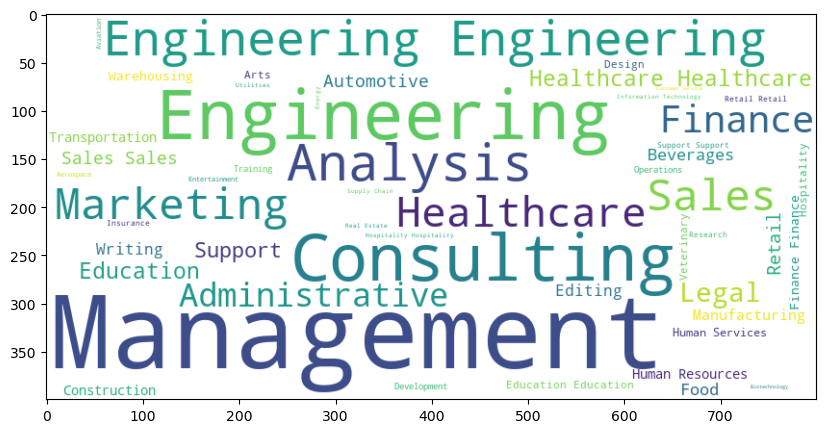

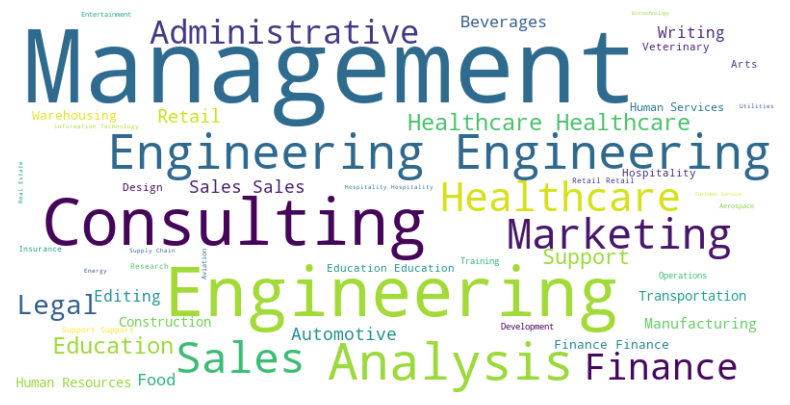

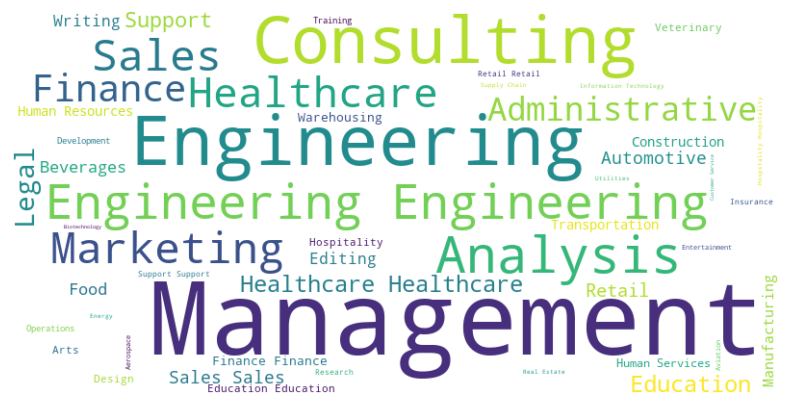

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[127], line 85, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
     83 scatter_fig = create_scatter_chart(filtered_df)
     84 map_fig = create_scatter_chart(filtered_df)
---> 85 wordcloud_img = create_wordcloud(filtered_df)
        filtered_df =        Experience Level  Medium Salary State  \
0      Mid-Senior level          10400    CA   
1             Associate           6875    NY   
2           Entry level           7500    FL   
3             Associate           2960    VA   
4      Mid-Senior level          14166    CA   
...                 ...            ...   ...   
19697  Mid-Senior level          13125    CA   
19698  Mid-Senior level           6400    CA   
19699  Mid-Senior level           6400    CA   
19700  Mid-Senior level          13125    CA   
19701  Mi

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[71], line 164, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
    162 predictive_model_fig = create_scatter_chart(filtered_df)  # Placeholder for predictive model results
    163 map_fig = create_map_chart(filtered_df)
--> 164 topic_modeling_img = create_wordcloud()  # Nuvem de palavras para modelagem de tópicos
    166 return bar_fig, box_fig, predictive_model_fig, map_fig, 'data:image/png;base64,{}'.format(topic_modeling_img)

TypeError: create_wordcloud() missing 1 required positional argument: 'filtered_df'



In [127]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', scope='usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()  # Fechar a figura para liberar memória
    return image_base64

# Configurar o layout do Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category_input',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry_input',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience_input',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar_chart'),
    dcc.Graph(id='scatter_chart'),
    dcc.Graph(id='map_chart'),
    html.Img(id='wordcloud_img')
])

# Callbacks para atualizar os gráficos
@app.callback(
    [Output('bar_chart', 'figure'),
     Output('scatter_chart', 'figure'),
     Output('map_chart', 'figure'),
     Output('wordcloud_img', 'src')],
    [Input('category_input', 'value'),
     Input('industry_input', 'value'),
     Input('experience_input', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_scatter_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/map1.csv'

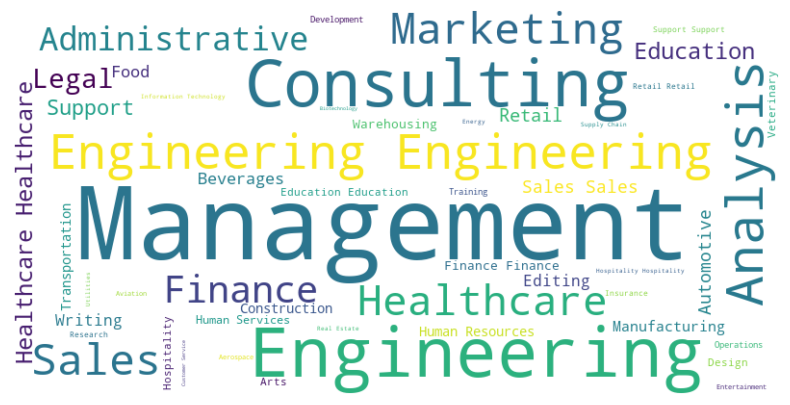

In [128]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Carregar os dados
df_map1 = pd.read_csv('/mnt/data/map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', scope='usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()  # Fechar a figura para liberar memória
    return image_base64

# Configurar o layout do Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category_input',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry_input',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience_input',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar_chart'),
    dcc.Graph(id='scatter_chart'),
    dcc.Graph(id='map_chart'),
    html.Img(id='wordcloud_img')
])

# Callbacks para atualizar os gráficos
@app.callback(
    [Output('bar_chart', 'figure'),
     Output('scatter_chart', 'figure'),
     Output('map_chart', 'figure'),
     Output('wordcloud_img', 'src')],
    [Input('category_input', 'value'),
     Input('industry_input', 'value'),
     Input('experience_input', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_scatter_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

In [129]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Atualize o caminho para o arquivo correto
df_map1 = pd.read_csv('/mnt/data/map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', scope='usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()  # Fechar a figura para liberar memória
    return image_base64

# Configurar o layout do Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category_input',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry_input',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience_input',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar_chart'),
    dcc.Graph(id='scatter_chart'),
    dcc.Graph(id='map_chart'),
    html.Img(id='wordcloud_img')
])

# Callbacks para atualizar os gráficos
@app.callback(
    [Output('bar_chart', 'figure'),
     Output('scatter_chart', 'figure'),
     Output('map_chart', 'figure'),
     Output('wordcloud_img', 'src')],
    [Input('category_input', 'value'),
     Input('industry_input', 'value'),
     Input('experience_input', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_scatter_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/map1.csv'

In [130]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Carregar os dados
df_map1 = pd.read_csv('/mnt/data/map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', scope='usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close()  # Fechar a figura para liberar memória
    return image_base64

# Configurar o layout do Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category_input',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry_input',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience_input',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar_chart'),
    dcc.Graph(id='scatter_chart'),
    dcc.Graph(id='map_chart'),
    html.Img(id='wordcloud_img')
])

# Callbacks para atualizar os gráficos
@app.callback(
    [Output('bar_chart', 'figure'),
     Output('scatter_chart', 'figure'),
     Output('map_chart', 'figure'),
     Output('wordcloud_img', 'src')],
    [Input('category_input', 'value'),
     Input('industry_input', 'value'),
     Input('experience_input', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_scatter_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/map1.csv'

In [132]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry-dropdown',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience-dropdown',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='scatter-chart'),
    dcc.Graph(id='map-chart'),
    html.Img(id='wordcloud')
])

@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-chart', 'figure'),
     Output('map-chart', 'figure'),
     Output('wordcloud', 'src')],
    [Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_map_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[132], line 88, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
     86 scatter_fig = create_scatter_chart(filtered_df)
     87 map_fig = create_map_chart(filtered_df)
---> 88 wordcloud_img = create_wordcloud(filtered_df)
        filtered_df =        Experience Level  Medium Salary State  \
0      Mid-Senior level          10400    CA   
1             Associate           6875    NY   
2           Entry level           7500    FL   
3             Associate           2960    VA   
4      Mid-Senior level          14166    CA   
...                 ...            ...   ...   
19697  Mid-Senior level          13125    CA   
19698  Mid-Senior level           6400    CA   
19699  Mid-Senior level           6400    CA   
19700  Mid-Senior level          13125    CA   
19701  Mid-Se

In [134]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
        placeholder='Select Category'
    ),
    dcc.Dropdown(
        id='industry-dropdown',
        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
        placeholder='Select Industry'
    ),
    dcc.Dropdown(
        id='experience-dropdown',
        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
        placeholder='Select Experience Level'
    ),
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='scatter-chart'),
    dcc.Graph(id='map-chart'),
    html.Img(id='wordcloud')
])

@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-chart', 'figure'),
     Output('map-chart', 'figure'),
     Output('wordcloud', 'src')],
    [Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_map_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[134], line 88, in update_graph(
    selected_category=None,
    selected_industry=None,
    selected_experience=None
)
     86 scatter_fig = create_scatter_chart(filtered_df)
     87 map_fig = create_map_chart(filtered_df)
---> 88 wordcloud_img = create_wordcloud(filtered_df)
        filtered_df =        Experience Level  Medium Salary State  \
0      Mid-Senior level          10400    CA   
1             Associate           6875    NY   
2           Entry level           7500    FL   
3             Associate           2960    VA   
4      Mid-Senior level          14166    CA   
...                 ...            ...   ...   
19697  Mid-Senior level          13125    CA   
19698  Mid-Senior level           6400    CA   
19699  Mid-Senior level           6400    CA   
19700  Mid-Senior level          13125    CA   
19701  Mid-Se

In [139]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                dcc.Dropdown(
                    id='category-dropdown',
                    options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                    placeholder='Select Category'
                ),
                dcc.Dropdown(
                    id='industry-dropdown',
                    options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                    placeholder='Select Industry'
                ),
                dcc.Dropdown(
                    id='experience-dropdown',
                    options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                    placeholder='Select Experience Level'
                ),
                dcc.Graph(id='bar-chart'),
                dcc.Graph(id='scatter-chart'),
                dcc.Graph(id='map-chart'),
                html.Img(id='wordcloud')
            ]
        )
    ]
)

@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-chart', 'figure'),
     Output('map-chart', 'figure'),
     Output('wordcloud', 'src')],
    [Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_map_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                dcc.Dropdown(
                    id='category-dropdown',
                    options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                    placeholder='Select Category'
                ),
                dcc.Dropdown(
                    id='industry-dropdown',
                    options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                    placeholder='Select Industry'
                ),
                dcc.Dropdown(
                    id='experience-dropdown',
                    options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                    placeholder='Select Experience Level'
                ),
                dcc.Graph(id='bar-chart'),
                dcc.Graph(id='scatter-chart'),
                dcc.Graph(id='map-chart'),
                html.Img(id='wordcloud')
            ]
        )
    ]
)

@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-chart', 'figure'),
     Output('map-chart', 'figure'),
     Output('wordcloud', 'src')],
    [Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def update_graph(selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    bar_fig = create_bar_chart(filtered_df)
    scatter_fig = create_scatter_chart(filtered_df)
    map_fig = create_map_chart(filtered_df)
    wordcloud_img = create_wordcloud(filtered_df)

    return bar_fig, scatter_fig, map_fig, 'data:image/png;base64,{}'.format(wordcloud_img)

if __name__ == '__main__':
    app.run_server(debug=True)

In [141]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Gráfico de Barras', value='tab-1'),
                    dcc.Tab(label='Gráfico de Dispersão', value='tab-2'),
                    dcc.Tab(label='Mapa', value='tab-3'),
                    dcc.Tab(label='Nuvem de Palavras', value='tab-4'),
                ]),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_bar_chart(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

In [142]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ]),
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ]),
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Gráfico de Barras', value='tab-1'),
                    dcc.Tab(label='Gráfico de Dispersão', value='tab-2'),
                    dcc.Tab(label='Mapa', value='tab-3'),
                    dcc.Tab(label='Nuvem de Palavras', value='tab-4'),
                ]),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_bar_chart(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

In [298]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='#d3d7c3').generate(text)  # Mudar o fundo da nuvem de palavras para verde
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Salary Insights - Group 1', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Bar Chart', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_bar_chart(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

In [201]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.histogram(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='#d3d7c3').generate(text)  # Mudar o fundo da nuvem de palavras para verde
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Bar Chart', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_bar_chart(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

In [207]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Dados de exemplo para a nuvem de palavras
data = {
    'Marketing': 'communication skills management experience data analysis',
    'Sales': 'sales customer service management skills communication',
    'Support': 'service support management skills customer experience',
    'Engineering': 'engineering project management skills communication design',
    'Finance': 'accounting financial skills management analysis reporting',
    'Consulting': 'management specialist skills experience communication health'
}

# Função para gerar a nuvem de palavras
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Função para converter a nuvem de palavras em uma imagem
def wordcloud_to_image(wordcloud):
    img = BytesIO()
    wordcloud.to_image().save(img, format='PNG')
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()

# Aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Word Cloud Visualization"),
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': key, 'value': key} for key in data.keys()],
        value='Marketing'
    ),
    html.Img(id='wordcloud-img')
])

@app.callback(
    Output('wordcloud-img', 'src'),
    [Input('dropdown', 'value')]
)
def update_wordcloud(selected_value):
    text = data[selected_value]
    wordcloud = generate_wordcloud(text)
    img = wordcloud_to_image(wordcloud)
    return 'data:image/png;base64,{}'.format(img)

if __name__ == '__main__':
    app.run_server(debug=True)

In [208]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='#d3d7c3').generate(text)  # Mudar o fundo da nuvem de palavras para verde
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Bar Chart', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_bar_chart(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

In [222]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Funções para criar gráficos
def create_bar_chart(df):
    fig = px.bar(df, x='Category', y='Medium Salary', color='Category', barmode='group')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(filtered_df):
    text = ' '.join(filtered_df['Category'].astype(str).tolist() +
                    filtered_df['Industry'].astype(str).tolist() +
                    filtered_df['Experience Level'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='#d3d7c3').generate(text)  # Mudar o fundo da nuvem de palavras para verde
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Bar Chart', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_bar_chart(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

In [223]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Define mappings for each industry category
industry_info = {
    "Engineering": {
        "soft_skills": [
            "12. Problem-solving", "11. Analytical thinking", "10. Creativity", "9. Teamwork", "8. Communication skills",
            "7. Attention to detail", "6. Time management", "5. Adaptability", "4. Critical thinking",
            "3. Project management", "2. Technical aptitude", "1. Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Critical thinking",
            "8. Communication skills", "7. Data interpretation", "6. Time management", "5. Research skills",
            "4. Adaptability", "3. Creativity", "2. Strategic thinking", "1. Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Analytical thinking", "9. Client relationship management",
            "8. Adaptability", "7. Time management", "6. Presentation skills", "5. Negotiation skills",
            "4. Strategic thinking", "3. Teamwork", "2. Research skills", "1. Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    }
    # Continue with other categories...
}

# Funções para criar gráficos
def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(category):
    if category not in industry_info:
        return None
    
    info = industry_info[category]
    text = ' '.join(info['soft_skills'] + info['software_programs'] + info['study_fields'])
    wordcloud = WordCloud(width=1200, height=800, background_color='#d3d7c3').generate(text)  # Ajustar o tamanho da nuvem de palavras
    plt.figure(figsize=(15, 10))  # Ajustar o tamanho da figura
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Box Plot', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_box_plot(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4' and selected_category:
        wordcloud_img = create_wordcloud(selected_category)
        if wordcloud_img:
            return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%', 'height': 'auto'})
    return html.Div()

if __name__ == '__main__':
    app.run_server(debug=True)

In [224]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Define mappings for each industry category
industry_info = {
    "Engineering": {
        "soft_skills": [
            "12. Problem-solving", "11. Analytical thinking", "10. Creativity", "9. Teamwork", "8. Communication skills",
            "7. Attention to detail", "6. Time management", "5. Adaptability", "4. Critical thinking",
            "3. Project management", "2. Technical aptitude", "1. Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Critical thinking",
            "8. Communication skills", "7. Data interpretation", "6. Time management", "5. Research skills",
            "4. Adaptability", "3. Creativity", "2. Strategic thinking", "1. Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Analytical thinking", "9. Client relationship management",
            "8. Adaptability", "7. Time management", "6. Presentation skills", "5. Negotiation skills",
            "4. Strategic thinking", "3. Teamwork", "2. Research skills", "1. Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    }
    # Continue with other categories...
}

# Funções para criar gráficos
def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(category):
    if category not in industry_info:
        return None
    
    info = industry_info[category]
    text = ' '.join(info['soft_skills'] + info['software_programs'] + info['study_fields'])
    wordcloud = WordCloud(width=1200, height=800, background_color='#d3d7c3').generate(text)  # Ajustar o tamanho da nuvem de palavras
    plt.figure(figsize=(15, 10))  # Ajustar o tamanho da figura
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Box Plot', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_box_plot(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4' and selected_category:
        wordcloud_img = create_wordcloud(selected_category)
        if wordcloud_img:
            return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%', 'height': 'auto'})
        else:
            return html.Div('Word Cloud data is not available for the selected category.')
    return html.Div()

if __name__ == '__main__':
    app.run_server(debug=True)

In [226]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Define mappings for each industry category
industry_info = {
   "Engineering": {
        "soft_skills": [
            "12. Problem-solving", "11. Analytical thinking", "10. Creativity", "9. Teamwork", "8. Communication skills",
            "7. Attention to detail", "6. Time management", "5. Adaptability", "4. Critical thinking",
            "3. Project management", "2. Technical aptitude", "1. Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Critical thinking",
            "8. Communication skills", "7. Data interpretation", "6. Time management", "5. Research skills",
            "4. Adaptability", "3. Creativity", "2. Strategic thinking", "1. Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Analytical thinking", "9. Client relationship management",
            "8. Adaptability", "7. Time management", "6. Presentation skills", "5. Negotiation skills",
            "4. Strategic thinking", "3. Teamwork", "2. Research skills", "1. Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    },
    "Management": {
        "soft_skills": [
            "12. Leadership", "11. Communication skills", "10. Decision-making", "9. Problem-solving", "8. Time management",
            "7. Strategic thinking", "6. Teamwork", "5. Conflict resolution", "4. Adaptability", "3. Delegation",
            "2. Motivational skills", "1. Organizational skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "Slack", "Asana", "Trello"
        ],
        "study_fields": [
            "Business Administration", "Management", "Organizational Behavior", "Human Resources", "Operations Management"
        ]
    },
    "Sales": {
        "soft_skills": [
            "12. Communication skills", "11. Persuasion", "10. Negotiation skills", "9. Customer service", "8. Relationship building",
            "7. Time management", "6. Problem-solving", "5. Adaptability", "4. Resilience", "3. Goal-oriented",
            "2. Teamwork", "1. Active listening"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "CRM software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Communication", "Economics", "Psychology"
        ]
    },
    "Support": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Problem-solving", "9. Empathy", "8. Customer service",
            "7. Adaptability", "6. Attention to detail", "5. Time management", "4. Conflict resolution", "3. Teamwork",
            "2. Active listening", "1. Technical proficiency"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Zendesk", "Freshdesk"
        ],
        "study_fields": [
            "Communication", "Business Administration", "Information Technology", "Psychology"
        ]
    },
    "Healthcare": {
        "soft_skills": [
            "12. Communication skills", "11. Empathy", "10. Attention to detail", "9. Problem-solving", "8. Teamwork",
            "7. Time management", "6. Adaptability", "5. Patience", "4. Decision-making", "3. Ethical judgment",
            "2. Stress management", "1. Compassion"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical imaging software"
        ],
        "study_fields": [
            "Medicine", "Nursing", "Healthcare Administration", "Psychology", "Biomedical Sciences"
        ]
    },
    "Education": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Empathy", "9. Organizational skills", "8. Problem-solving",
            "7. Adaptability", "6. Creativity", "5. Time management", "4. Conflict resolution", "3. Leadership",
            "2. Motivational skills", "1. Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Learning Management Systems (LMS)", "Google Classroom"
        ],
        "study_fields": [
            "Education", "Educational Psychology", "Curriculum and Instruction", "Special Education", "Educational Administration"
        ]
    },
    "Finance": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Communication skills",
            "8. Ethical judgment", "7. Time management", "6. Critical thinking", "5. Decision-making", "4. Adaptability",
            "3. Teamwork", "2. Negotiation skills", "1. Organizational skills"
        ],
        "software_programs": [
            "Excel", "SQL", "Python", "Financial modeling software", "Bloomberg Terminal"
        ],
        "study_fields": [
            "Finance", "Accounting", "Economics", "Business Administration", "Mathematics"
        ]
    },
    "Marketing": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Analytical thinking", "9. Problem-solving", "8. Adaptability",
            "7. Strategic thinking", "6. Teamwork", "5. Time management", "4. Negotiation skills", "3. Project management",
            "2. Customer focus", "1. Attention to detail"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "Google Analytics", "SEO tools", "CRM software"
        ],
        "study_fields": [
            "Marketing", "Business Administration", "Communication", "Public Relations", "Digital Marketing"
        ]
    },
    "Human Resources": {
        "soft_skills": [
            "12. Communication skills", "11. Empathy", "10. Problem-solving", "9. Conflict resolution", "8. Adaptability",
            "7. Organizational skills", "6. Time management", "5. Negotiation skills", "4. Teamwork", "3. Ethical judgment",
            "2. Leadership", "1. Decision-making"
        ],
        "software_programs": [
            "HR Information Systems (HRIS)", "Applicant Tracking Systems (ATS)", "Payroll software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Human Resources Management", "Business Administration", "Psychology", "Organizational Behavior", "Labor Relations"
        ]
    },
    "Information Technology": {
        "soft_skills": [
            "12. Analytical thinking", "11. Problem-solving", "10. Communication skills", "9. Attention to detail",
            "8. Time management", "7. Adaptability", "6. Teamwork", "5. Technical proficiency", "4. Project management",
            "3. Critical thinking", "2. Troubleshooting", "1. Customer service"
        ],
        "software_programs": [
            "SQL", "Python", "Java", "Linux/Unix", "Microsoft Office Suite", "Network management tools",
            "Cybersecurity tools (e.g., firewalls, antivirus software)", "Database management systems (e.g., Oracle, MySQL)"
        ],
        "study_fields": [
            "Computer Science", "Information Technology", "Cybersecurity", "Software Engineering", "Network Administration"
        ]
    },
    "Legal": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Communication skills", "9. Problem-solving",
            "8. Ethical judgment", "7. Time management", "6. Critical thinking", "5. Negotiation skills", "4. Research skills",
            "3. Teamwork", "2. Decision-making", "1. Conflict resolution"
        ],
        "software_programs": [
            "Legal research databases (e.g., LexisNexis, Westlaw)", "Case management software", "Document management systems",
            "Microsoft Office Suite"
        ],
        "study_fields": [
            "Law", "Legal Studies", "Political Science", "Criminal Justice", "Business Law"
        ]
    },
    "Operations": {
        "soft_skills": [
            "12. Problem-solving", "11. Analytical thinking", "10. Communication skills", "9. Organizational skills",
            "8. Time management", "7. Teamwork", "6. Adaptability", "5. Decision-making", "4. Project management",
            "3. Strategic thinking", "2. Attention to detail", "1. Leadership"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Project management software (e.g., Asana, Trello)",
            "Data analysis tools (e.g., Excel, Tableau)"
        ],
        "study_fields": [
            "Operations Management", "Business Administration", "Supply Chain Management", "Industrial Engineering", "Logistics"
        ]
    },
    "Product Management": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Analytical thinking", "9. Project management",
            "8. Time management", "7. Teamwork", "6. Strategic thinking", "5. Decision-making", "4. Adaptability",
            "3. Negotiation skills", "2. Leadership", "1. Customer focus"
        ],
        "software_programs": [
            "JIRA", "Asana", "Trello", "Microsoft Office Suite", "Product lifecycle management (PLM) tools",
            "Analytics tools (e.g., Google Analytics, Tableau)"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Computer Science", "Engineering", "Economics"
        ]
    },
    "Project Management": {
        "soft_skills": [
            "12. Leadership", "11. Communication skills", "10. Problem-solving", "9. Time management", "8. Teamwork",
            "7. Organizational skills", "6. Decision-making", "5. Negotiation skills", "4. Adaptability", "3. Strategic thinking",
            "2. Conflict resolution", "1. Attention to detail"
        ],
        "software_programs": [
            "Microsoft Project", "Asana", "Trello", "JIRA", "Slack", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Project Management", "Business Administration", "Engineering", "Information Technology", "Operations Management"
        ]
    },
    "Research": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Communication skills",
            "8. Time management", "7. Critical thinking", "6. Adaptability", "5. Research skills", "4. Teamwork",
            "3. Technical proficiency", "2. Creativity", "1. Data interpretation"
        ],
        "software_programs": [
            "Statistical analysis software (e.g., SPSS, R)", "Data visualization tools (e.g., Tableau, Power BI)",
            "Microsoft Office Suite", "Research databases", "Lab management software"
        ],
        "study_fields": [
            "Research Methodology", "Statistics", "Data Science", "Biology", "Chemistry"
        ]
    },
    "Supply Chain": {
        "soft_skills": [
            "12. Organizational skills", "11. Problem-solving", "10. Communication skills", "9. Time management",
            "8. Analytical thinking", "7. Attention to detail", "6. Teamwork", "5. Negotiation skills", "4. Adaptability",
            "3. Strategic thinking", "2. Decision-making", "1. Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Training and Development": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Problem-solving", "9. Organizational skills", "8. Adaptability",
            "7. Creativity", "6. Leadership", "5. Time management", "4. Motivational skills", "3. Teamwork",
            "2. Conflict resolution", "1. Presentation skills"
        ],
        "software_programs": [
            "Learning Management Systems (LMS)", "Microsoft Office Suite", "Presentation software (e.g., PowerPoint, Prezi)",
            "E-learning software (e.g., Articulate, Captivate)"
        ],
        "study_fields": [
            "Human Resources Management", "Education", "Organizational Development", "Psychology", "Business Administration"
        ]
    },
    "Writing and Editing": {
        "soft_skills": [
            "12. Communication skills", "11. Attention to detail", "10. Creativity", "9. Time management", "8. Critical thinking",
            "7. Adaptability", "6. Research skills", "5. Teamwork", "4. Organizational skills", "3. Problem-solving",
            "2. Editing proficiency", "1. Content management"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Docs", "Grammarly", "Content management systems (CMS)", "Adobe Creative Suite"
        ],
        "study_fields": [
            "English", "Journalism", "Communications", "Creative Writing", "Marketing"
        ]
    },
    "Construction": {
        "soft_skills": [
            "12. Teamwork", "11. Communication skills", "10. Problem-solving", "9. Attention to detail", "8. Time management",
            "7. Adaptability", "6. Physical stamina", "5. Technical proficiency", "4. Project management", "3. Safety awareness",
            "2. Leadership", "1. Decision-making"
        ],
        "software_programs": [
            "AutoCAD", "Revit", "Microsoft Office Suite", "Project management software (e.g., Procore)", "Estimation software (e.g., Bluebeam)"
        ],
        "study_fields": [
            "Construction Management", "Civil Engineering", "Architecture", "Project Management", "Industrial Technology"
        ]
    },
    "Retail": {
        "soft_skills": [
            "12. Customer service", "11. Communication skills", "10. Problem-solving", "9. Teamwork", "8. Time management",
            "7. Adaptability", "6. Organizational skills", "5. Attention to detail", "4. Sales skills", "3. Patience",
            "2. Conflict resolution", "1. Product knowledge"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Microsoft Office Suite", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Retail Management", "Communications", "Sales"
        ]
    },
    "Customer Service": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Problem-solving", "9. Empathy", "8. Customer service",
            "7. Adaptability", "6. Attention to detail", "5. Time management", "4. Conflict resolution", "3. Teamwork",
            "2. Active listening", "1. Stress management"
        ],
        "software_programs": [
            "CRM software", "Help desk software (e.g., Zendesk, Freshdesk)", "Microsoft Office Suite", "Call center software"
        ],
        "study_fields": [
            "Communications", "Business Administration", "Psychology", "Customer Service Management", "Marketing"
        ]
    },
    "Administrative": {
        "soft_skills": [
            "12. Organizational skills", "11. Communication skills", "10. Attention to detail", "9. Time management",
            "8. Problem-solving", "7. Adaptability", "6. Teamwork", "5. Customer service", "4. Multitasking",
            "3. Decision-making", "2. Confidentiality", "1. Proactivity"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Workspace", "Scheduling software", "Document management systems"
        ],
        "study_fields": [
            "Business Administration", "Office Administration", "Communication", "Management", "Public Administration"
        ]
    },
    "Food and Beverages": {
        "soft_skills": [
            "12. Communication skills", "11. Teamwork", "10. Attention to detail", "9. Time management", "8. Adaptability",
            "7. Customer service", "6. Problem-solving", "5. Creativity", "4. Physical stamina", "3. Multitasking",
            "2. Stress management", "1. Leadership"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Culinary Arts", "Hospitality Management", "Food Science", "Business Administration", "Nutrition"
        ]
    },
    "Manufacturing": {
        "soft_skills": [
            "12. Attention to detail", "11. Problem-solving", "10. Teamwork", "9. Time management", "8. Adaptability",
            "7. Communication skills", "6. Technical proficiency", "5. Organizational skills", "4. Physical stamina",
            "3. Quality control", "2. Decision-making", "1. Safety awareness"
        ],
        "software_programs": [
            "ERP systems", "Microsoft Office Suite", "CAD software", "Quality control software"
        ],
        "study_fields": [
            "Industrial Engineering", "Manufacturing Engineering", "Mechanical Engineering", "Business Administration", "Quality Assurance"
        ]
    },
    "Logistics": {
        "soft_skills": [
            "12. Organizational skills", "11. Problem-solving", "10. Communication skills", "9. Time management",
            "8. Analytical thinking", "7. Attention to detail", "6. Teamwork", "5. Negotiation skills", "4. Adaptability",
            "3. Strategic thinking", "2. Decision-making", "1. Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Arts and Design": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Attention to detail", "9. Time management", "8. Adaptability",
            "7. Problem-solving", "6. Teamwork", "5. Critical thinking", "4. Technical proficiency", "3. Presentation skills",
            "2. Innovation", "1. Project management"
        ],
        "software_programs": [
            "Adobe Creative Suite", "AutoCAD", "SketchUp", "Microsoft Office Suite", "Digital design tools (e.g., Figma, InVision)"
        ],
        "study_fields": [
            "Graphic Design", "Fine Arts", "Interior Design", "Architecture", "Industrial Design"
        ]
    },
    "Entertainment": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Teamwork", "9. Adaptability", "8. Problem-solving",
            "7. Time management", "6. Presentation skills", "5. Networking skills", "4. Attention to detail",
            "3. Technical proficiency", "2. Stress management", "1. Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "12. Communication skills", "11. Negotiation skills", "10. Customer service", "9. Problem-solving",
            "8. Attention to detail", "7. Time management", "6. Adaptability", "5. Sales skills", "4. Networking skills",
            "3. Organizational skills", "2. Teamwork", "1. Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Healthcare Support": {
        "soft_skills": [
            "12. Communication skills", "11. Attention to detail", "10. Empathy", "9. Customer service",
            "8. Problem-solving", "7. Teamwork", "6. Adaptability", "5. Time management", "4. Organizational skills",
            "3. Confidentiality", "2. Patience", "1. Technical proficiency"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical billing and coding software"
        ],
        "study_fields": [
            "Healthcare Administration", "Medical Billing and Coding", "Health Information Management", "Nursing", "Medical Assisting"
        ]
    },
    "Human Services": {
        "soft_skills": [
            "12. Empathy", "11. Communication skills", "10. Problem-solving", "9. Teamwork", "8. Time management",
            "7. Adaptability", "6. Conflict resolution", "5. Patience", "4. Organizational skills", "3. Decision-making",
            "2. Stress management", "1. Ethical judgment"
        ],
        "software_programs": [
            "Case management software", "Microsoft Office Suite", "Database management systems"
        ],
        "study_fields": [
            "Social Work", "Psychology", "Counseling", "Human Services", "Sociology"
        ]
    },
    "Fitness": {
        "soft_skills": [
            "12. Communication skills", "11. Motivation", "10. Problem-solving", "9. Patience", "8. Adaptability",
            "7. Teamwork", "6. Time management", "5. Customer service", "4. Interpersonal skills", "3. Organizational skills",
            "2. Leadership", "1. Physical stamina"
        ],
        "software_programs": [
            "Fitness tracking apps", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Kinesiology", "Exercise Science", "Sports Management", "Physical Education", "Nutrition"
        ]
    },
    "Aviation and Aerospace": {
        "soft_skills": [
            "12. Attention to detail", "11. Problem-solving", "10. Communication skills", "9. Teamwork", "8. Adaptability",
            "7. Time management", "6. Technical proficiency", "5. Critical thinking", "4. Stress management",
            "3. Decision-making", "2. Leadership", "1. Safety awareness"
        ],
        "software_programs": [
            "Flight simulation software", "Aircraft maintenance software", "Microsoft Office Suite", "CAD software (e.g., CATIA, SolidWorks)"
        ],
        "study_fields": [
            "Aerospace Engineering", "Aviation Management", "Mechanical Engineering", "Electrical Engineering", "Pilot Training"
        ]
    },
    "Automotive": {
        "soft_skills": [
            "12. Problem-solving", "11. Technical proficiency", "10. Communication skills", "9. Attention to detail",
            "8. Time management", "7. Teamwork", "6. Customer service", "5. Adaptability", "4. Organizational skills",
            "3. Physical stamina", "2. Decision-making", "1. Stress management"
        ],
        "software_programs": [
            "Diagnostic tools (e.g., OBD-II scanners)", "AutoCAD", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Automotive Technology", "Mechanical Engineering", "Electrical Engineering", "Business Administration", "Industrial Technology"
        ]
    },
        "Banking": {
        "soft_skills": [
            "12. Communication skills", "11. Customer service", "10. Attention to detail", "9. Problem-solving",
            "8. Analytical thinking", "7. Time management", "6. Teamwork", "5. Ethical judgment", "4. Adaptability",
            "3. Organizational skills", "2. Negotiation skills", "1. Decision-making"
        ],
        "software_programs": [
            "Banking software", "Microsoft Office Suite", "Financial analysis tools"
        ],
        "study_fields": [
            "Finance", "Accounting", "Business Administration", "Economics", "Banking"
        ]
    },
    "Biotechnology": {
        "soft_skills": [
            "12. Analytical thinking", "11. Problem-solving", "10. Attention to detail", "9. Communication skills",
            "8. Research skills", "7. Teamwork", "6. Time management", "5. Adaptability", "4. Critical thinking",
            "3. Technical proficiency", "2. Creativity", "1. Ethical judgment"
        ],
        "software_programs": [
            "Laboratory information management systems (LIMS)", "Bioinformatics software", "Microsoft Office Suite",
            "Statistical analysis software (e.g., SPSS, R)"
        ],
        "study_fields": [
            "Biotechnology", "Molecular Biology", "Biochemistry", "Biomedical Engineering", "Genetics"
        ]
    },
    "Communications": {
        "soft_skills": [
            "12. Communication skills", "11. Public speaking", "10. Problem-solving", "9. Creativity",
            "8. Adaptability", "7. Teamwork", "6. Time management", "5. Conflict resolution", "4. Attention to detail",
            "3. Negotiation skills", "2. Organizational skills", "1. Networking skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Social media management tools", "CRM software", "Content management systems (CMS)"
        ],
        "study_fields": [
            "Communications", "Public Relations", "Journalism", "Marketing", "Media Studies"
        ]
    },
    "Energy and Utilities": {
        "soft_skills": [
            "12. Technical proficiency", "11. Safety awareness", "10. Analytical thinking", "9. Problem-solving",
            "8. Attention to detail", "7. Communication skills", "6. Critical thinking", "5. Teamwork",
            "4. Time management", "3. Decision-making", "2. Adaptability", "1. Project management"
        ],
        "software_programs": [
            "SCADA systems", "Microsoft Office Suite", "GIS software", "Energy management systems"
        ],
        "study_fields": [
            "Energy Management", "Environmental Science", "Electrical Engineering", "Mechanical Engineering", "Renewable Energy"
        ]
    },
    "Environmental Services": {
        "soft_skills": [
            "12. Analytical thinking", "11. Research skills", "10. Attention to detail", "9. Problem-solving",
            "8. Communication skills", "7. Critical thinking", "6. Teamwork", "5. Adaptability", "4. Time management",
            "3. Creativity", "2. Ethical judgment", "1. Project management"
        ],
        "software_programs": [
            "GIS software", "Microsoft Office Suite", "Environmental monitoring software", "Data analysis tools"
        ],
        "study_fields": [
            "Environmental Science", "Ecology", "Environmental Engineering", "Geology", "Biology"
        ]
    },
    "Hospitality": {
        "soft_skills": [
            "12. Customer service", "11. Communication skills", "10. Problem-solving", "9. Teamwork",
            "8. Time management", "7. Adaptability", "6. Organizational skills", "5. Attention to detail",
            "4. Multitasking", "3. Patience", "2. Conflict resolution", "1. Leadership"
        ],
        "software_programs": [
            "Property management systems (PMS)", "Event management software", "Microsoft Office Suite", "Reservation systems"
        ],
        "study_fields": [
            "Hospitality Management", "Tourism", "Business Administration", "Event Planning", "Hotel Management"
        ]
    },
    "Insurance": {
        "soft_skills": [
            "12. Communication skills", "11. Customer service", "10. Problem-solving", "9. Analytical thinking",
            "8. Attention to detail", "7. Negotiation skills", "6. Time management", "5. Teamwork",
            "4. Ethical judgment", "3. Adaptability", "2. Decision-making", "1. Organizational skills"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Insurance claims management software", "Actuarial software"
        ],
        "study_fields": [
            "Finance", "Accounting", "Business Administration", "Actuarial Science", "Risk Management"
        ]
    },
    "Manufacturing": {
        "soft_skills": [
            "12. Attention to detail", "11. Problem-solving", "10. Teamwork", "9. Time management",
            "8. Adaptability", "7. Communication skills", "6. Technical proficiency", "5. Organizational skills",
            "4. Physical stamina", "3. Quality control", "2. Decision-making", "1. Safety awareness"
        ],
        "software_programs": [
            "ERP systems", "Microsoft Office Suite", "CAD software", "Quality control software"
        ],
        "study_fields": [
            "Industrial Engineering", "Manufacturing Engineering", "Mechanical Engineering", "Business Administration", "Quality Assurance"
        ]
    },
    "Media and Entertainment": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Teamwork", "9. Adaptability", "8. Problem-solving",
            "7. Time management", "6. Presentation skills", "5. Networking skills", "4. Attention to detail",
            "3. Technical proficiency", "2. Stress management", "1. Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Public Sector": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Teamwork", "9. Adaptability", "8. Analytical thinking",
            "7. Attention to detail", "6. Organizational skills", "5. Time management", "4. Conflict resolution",
            "3. Ethical judgment", "2. Decision-making", "1. Strategic thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Data analysis tools", "Project management software", "Policy analysis tools"
        ],
        "study_fields": [
            "Public Administration", "Political Science", "Sociology", "Public Policy", "Economics"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "12. Communication skills", "11. Negotiation skills", "10. Customer service", "9. Problem-solving",
            "8. Attention to detail", "7. Time management", "6. Adaptability", "5. Sales skills", "4. Networking skills",
            "3. Organizational skills", "2. Teamwork", "1. Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Telecommunications": {
        "soft_skills": [
            "12. Technical proficiency", "11. Communication skills", "10. Problem-solving", "9. Attention to detail",
            "8. Teamwork", "7. Adaptability", "6. Time management", "5. Customer service", "4. Organizational skills",
            "3. Analytical thinking", "2. Project management", "1. Safety awareness"
        ],
        "software_programs": [
            "Network management tools", "Microsoft Office Suite", "Telecommunications software", "CAD software"
        ],
        "study_fields": [
            "Telecommunications Engineering", "Electrical Engineering", "Computer Science", "Information Technology", "Network Administration"
        ]
    },
    "Transportation": {
        "soft_skills": [
            "12. Communication skills", "11. Time management", "10. Problem-solving", "9. Attention to detail",
            "8. Teamwork", "7. Adaptability", "6. Customer service", "5. Organizational skills", "4. Stress management",
            "3. Decision-making", "2. Physical stamina", "1. Safety awareness"
        ],
        "software_programs": [
            "Fleet management software", "GPS tracking systems", "Microsoft Office Suite", "Logistics software"
        ],
        "study_fields": [
            "Transportation Management", "Logistics", "Supply Chain Management", "Business Administration", "Urban Planning"
        ]
    },
    "Veterinary": {
        "soft_skills": [
            "12. Communication skills", "11. Empathy", "10. Attention to detail", "9. Problem-solving",
            "8. Teamwork", "7. Adaptability", "6. Time management", "5. Customer service", "4. Patience",
            "3. Physical stamina", "2. Organizational skills", "1. Stress management"
        ],
        "software_programs": [
            "Veterinary practice management software", "Microsoft Office Suite", "Medical imaging software", "Laboratory information systems"
        ],
        "study_fields": [
            "Veterinary Medicine", "Animal Science", "Zoology", "Biology", "Veterinary Technology"
        ]
    },
    "Warehousing": {
        "soft_skills": [
            "12. Teamwork", "11. Attention to detail", "10. Time management", "9. Organizational skills",
            "8. Communication skills", "7. Problem-solving", "6. Physical stamina", "5. Adaptability",
            "4. Technical proficiency", "3. Safety awareness", "2. Efficiency", "1. Inventory management"
        ],
        "software_programs": [
            "Warehouse management systems (WMS)", "Microsoft Office Suite", "Inventory tracking software", "ERP systems"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Business Administration", "Industrial Engineering", "Operations Management"
        ]
    }
}


# Funções para criar gráficos
def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(category):
    if category not in industry_info:
        return None
    
    info = industry_info[category]
    text = ' '.join(info['soft_skills'] + info['software_programs'] + info['study_fields'])
    wordcloud = WordCloud(width=1200, height=800, background_color='#d3d7c3').generate(text)  # Ajustar o tamanho da nuvem de palavras
    plt.figure(figsize=(15, 10))  # Ajustar o tamanho da figura
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in industry_info.keys()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Box Plot', value='tab-1'),
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return dcc.Graph(figure=create_box_plot(filtered_df))
    elif tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4' and selected_category:
        wordcloud_img = create_wordcloud(selected_category)
        if wordcloud_img:
            return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%', 'height': 'auto'})
        else:
            return html.Div('Word Cloud data is not available for the selected category.')
    return html.Div()

if __name__ == '__main__':
    app.run_server(debug=True)

In [321]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Define mappings for each industry category
industry_info = {
    "Engineering": {
        "soft_skills": [
            "12. Problem-solving", "11. Analytical thinking", "10. Creativity", "9. Teamwork", "8. Communication skills",
            "7. Attention to detail", "6. Time management", "5. Adaptability", "4. Critical thinking",
            "3. Project management", "2. Technical aptitude", "1. Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Critical thinking",
            "8. Communication skills", "7. Data interpretation", "6. Time management", "5. Research skills",
            "4. Adaptability", "3. Creativity", "2. Strategic thinking", "1. Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Analytical thinking", "9. Client relationship management",
            "8. Adaptability", "7. Time management", "6. Presentation skills", "5. Negotiation skills",
            "4. Strategic thinking", "3. Teamwork", "2. Research skills", "1. Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    },
    "Management": {
        "soft_skills": [
            "12. Leadership", "11. Communication skills", "10. Decision-making", "9. Problem-solving", "8. Time management",
            "7. Strategic thinking", "6. Teamwork", "5. Conflict resolution", "4. Adaptability", "3. Delegation",
            "2. Motivational skills", "1. Organizational skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "Slack", "Asana", "Trello"
        ],
        "study_fields": [
            "Business Administration", "Management", "Organizational Behavior", "Human Resources", "Operations Management"
        ]
    },
    "Sales": {
        "soft_skills": [
            "12. Communication skills", "11. Persuasion", "10. Negotiation skills", "9. Customer service", "8. Relationship building",
            "7. Time management", "6. Problem-solving", "5. Adaptability", "4. Resilience", "3. Goal-oriented",
            "2. Teamwork", "1. Active listening"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "CRM software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Communication", "Economics", "Psychology"
        ]
    },
    "Support": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Problem-solving", "9. Empathy", "8. Customer service",
            "7. Adaptability", "6. Attention to detail", "5. Time management", "4. Conflict resolution", "3. Teamwork",
            "2. Active listening", "1. Technical proficiency"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Zendesk", "Freshdesk"
        ],
        "study_fields": [
            "Communication", "Business Administration", "Information Technology", "Psychology"
        ]
    },
    "Healthcare": {
        "soft_skills": [
            "12. Communication skills", "11. Empathy", "10. Attention to detail", "9. Problem-solving", "8. Teamwork",
            "7. Time management", "6. Adaptability", "5. Patience", "4. Decision-making", "3. Ethical judgment",
            "2. Stress management", "1. Compassion"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical imaging software"
        ],
        "study_fields": [
            "Medicine", "Nursing", "Healthcare Administration", "Psychology", "Biomedical Sciences"
        ]
    },
    "Education": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Empathy", "9. Organizational skills", "8. Problem-solving",
            "7. Adaptability", "6. Creativity", "5. Time management", "4. Conflict resolution", "3. Leadership",
            "2. Motivational skills", "1. Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Learning Management Systems (LMS)", "Google Classroom"
        ],
        "study_fields": [
            "Education", "Educational Psychology", "Curriculum and Instruction", "Special Education", "Educational Administration"
        ]
    },
    "Finance": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Communication skills",
            "8. Ethical judgment", "7. Time management", "6. Critical thinking", "5. Decision-making", "4. Adaptability",
            "3. Teamwork", "2. Negotiation skills", "1. Organizational skills"
        ],
        "software_programs": [
            "Excel", "SQL", "Python", "Financial modeling software", "Bloomberg Terminal"
        ],
        "study_fields": [
            "Finance", "Accounting", "Economics", "Business Administration", "Mathematics"
        ]
    },
    "Marketing": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Analytical thinking", "9. Problem-solving", "8. Adaptability",
            "7. Strategic thinking", "6. Teamwork", "5. Time management", "4. Negotiation skills", "3. Project management",
            "2. Customer focus", "1. Attention to detail"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "Google Analytics", "SEO tools", "CRM software"
        ],
        "study_fields": [
            "Marketing", "Business Administration", "Communication", "Public Relations", "Digital Marketing"
        ]
    },
    "Human Resources": {
        "soft_skills": [
            "12. Communication skills", "11. Empathy", "10. Problem-solving", "9. Conflict resolution", "8. Adaptability",
            "7. Organizational skills", "6. Time management", "5. Negotiation skills", "4. Teamwork", "3. Ethical judgment",
            "2. Leadership", "1. Decision-making"
        ],
        "software_programs": [
            "HR Information Systems (HRIS)", "Applicant Tracking Systems (ATS)", "Payroll software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Human Resources Management", "Business Administration", "Psychology", "Organizational Behavior", "Labor Relations"
        ]
    },
    "Information Technology": {
        "soft_skills": [
            "12. Analytical thinking", "11. Problem-solving", "10. Communication skills", "9. Attention to detail",
            "8. Time management", "7. Adaptability", "6. Teamwork", "5. Technical proficiency", "4. Project management",
            "3. Critical thinking", "2. Troubleshooting", "1. Customer service"
        ],
        "software_programs": [
            "SQL", "Python", "Java", "Linux/Unix", "Microsoft Office Suite", "Network management tools",
            "Cybersecurity tools (e.g., firewalls, antivirus software)", "Database management systems (e.g., Oracle, MySQL)"
        ],
        "study_fields": [
            "Computer Science", "Information Technology", "Cybersecurity", "Software Engineering", "Network Administration"
        ]
    },
    "Legal": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Communication skills", "9. Problem-solving",
            "8. Ethical judgment", "7. Time management", "6. Critical thinking", "5. Negotiation skills", "4. Research skills",
            "3. Teamwork", "2. Decision-making", "1. Conflict resolution"
        ],
        "software_programs": [
            "Legal research databases (e.g., LexisNexis, Westlaw)", "Case management software", "Document management systems",
            "Microsoft Office Suite"
        ],
        "study_fields": [
            "Law", "Legal Studies", "Political Science", "Criminal Justice", "Business Law"
        ]
    },
    "Operations": {
        "soft_skills": [
            "12. Problem-solving", "11. Analytical thinking", "10. Communication skills", "9. Organizational skills",
            "8. Time management", "7. Teamwork", "6. Adaptability", "5. Decision-making", "4. Project management",
            "3. Strategic thinking", "2. Attention to detail", "1. Leadership"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Project management software (e.g., Asana, Trello)",
            "Data analysis tools (e.g., Excel, Tableau)"
        ],
        "study_fields": [
            "Operations Management", "Business Administration", "Supply Chain Management", "Industrial Engineering", "Logistics"
        ]
    },
    "Product Management": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Analytical thinking", "9. Project management",
            "8. Time management", "7. Teamwork", "6. Strategic thinking", "5. Decision-making", "4. Adaptability",
            "3. Negotiation skills", "2. Leadership", "1. Customer focus"
        ],
        "software_programs": [
            "JIRA", "Asana", "Trello", "Microsoft Office Suite", "Product lifecycle management (PLM) tools",
            "Analytics tools (e.g., Google Analytics, Tableau)"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Computer Science", "Engineering", "Economics"
        ]
    },
    "Project Management": {
        "soft_skills": [
            "12. Leadership", "11. Communication skills", "10. Problem-solving", "9. Time management", "8. Teamwork",
            "7. Organizational skills", "6. Decision-making", "5. Negotiation skills", "4. Adaptability", "3. Strategic thinking",
            "2. Conflict resolution", "1. Attention to detail"
        ],
        "software_programs": [
            "Microsoft Project", "Asana", "Trello", "JIRA", "Slack", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Project Management", "Business Administration", "Engineering", "Information Technology", "Operations Management"
        ]
    },
    "Research": {
        "soft_skills": [
            "12. Analytical thinking", "11. Attention to detail", "10. Problem-solving", "9. Communication skills",
            "8. Time management", "7. Critical thinking", "6. Adaptability", "5. Research skills", "4. Teamwork",
            "3. Technical proficiency", "2. Creativity", "1. Data interpretation"
        ],
        "software_programs": [
            "Statistical analysis software (e.g., SPSS, R)", "Data visualization tools (e.g., Tableau, Power BI)",
            "Microsoft Office Suite", "Research databases", "Lab management software"
        ],
        "study_fields": [
            "Research Methodology", "Statistics", "Data Science", "Biology", "Chemistry"
        ]
    },
    "Supply Chain": {
        "soft_skills": [
            "12. Organizational skills", "11. Problem-solving", "10. Communication skills", "9. Time management",
            "8. Analytical thinking", "7. Attention to detail", "6. Teamwork", "5. Negotiation skills", "4. Adaptability",
            "3. Strategic thinking", "2. Decision-making", "1. Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Training and Development": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Problem-solving", "9. Organizational skills", "8. Adaptability",
            "7. Creativity", "6. Leadership", "5. Time management", "4. Motivational skills", "3. Teamwork",
            "2. Conflict resolution", "1. Presentation skills"
        ],
        "software_programs": [
            "Learning Management Systems (LMS)", "Microsoft Office Suite", "Presentation software (e.g., PowerPoint, Prezi)",
            "E-learning software (e.g., Articulate, Captivate)"
        ],
        "study_fields": [
            "Human Resources Management", "Education", "Organizational Development", "Psychology", "Business Administration"
        ]
    },
    "Writing and Editing": {
        "soft_skills": [
            "12. Communication skills", "11. Attention to detail", "10. Creativity", "9. Time management", "8. Critical thinking",
            "7. Adaptability", "6. Research skills", "5. Teamwork", "4. Organizational skills", "3. Problem-solving",
            "2. Editing proficiency", "1. Content management"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Docs", "Grammarly", "Content management systems (CMS)", "Adobe Creative Suite"
        ],
        "study_fields": [
            "English", "Journalism", "Communications", "Creative Writing", "Marketing"
        ]
    },
    "Construction": {
        "soft_skills": [
            "12. Teamwork", "11. Communication skills", "10. Problem-solving", "9. Attention to detail", "8. Time management",
            "7. Adaptability", "6. Physical stamina", "5. Technical proficiency", "4. Project management", "3. Safety awareness",
            "2. Leadership", "1. Decision-making"
        ],
        "software_programs": [
            "AutoCAD", "Revit", "Microsoft Office Suite", "Project management software (e.g., Procore)", "Estimation software (e.g., Bluebeam)"
        ],
        "study_fields": [
            "Construction Management", "Civil Engineering", "Architecture", "Project Management", "Industrial Technology"
        ]
    },
    "Retail": {
        "soft_skills": [
            "12. Customer service", "11. Communication skills", "10. Problem-solving", "9. Teamwork", "8. Time management",
            "7. Adaptability", "6. Organizational skills", "5. Attention to detail", "4. Sales skills", "3. Patience",
            "2. Conflict resolution", "1. Product knowledge"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Microsoft Office Suite", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Retail Management", "Communications", "Sales"
        ]
    },
    "Customer Service": {
        "soft_skills": [
            "12. Communication skills", "11. Patience", "10. Problem-solving", "9. Empathy", "8. Customer service",
            "7. Adaptability", "6. Attention to detail", "5. Time management", "4. Conflict resolution", "3. Teamwork",
            "2. Active listening", "1. Stress management"
        ],
        "software_programs": [
            "CRM software", "Help desk software (e.g., Zendesk, Freshdesk)", "Microsoft Office Suite", "Call center software"
        ],
        "study_fields": [
            "Communications", "Business Administration", "Psychology", "Customer Service Management", "Marketing"
        ]
    },
    "Administrative": {
        "soft_skills": [
            "12. Organizational skills", "11. Communication skills", "10. Attention to detail", "9. Time management",
            "8. Problem-solving", "7. Adaptability", "6. Teamwork", "5. Customer service", "4. Multitasking",
            "3. Decision-making", "2. Confidentiality", "1. Proactivity"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Workspace", "Scheduling software", "Document management systems"
        ],
        "study_fields": [
            "Business Administration", "Office Administration", "Communication", "Management", "Public Administration"
        ]
    },
    "Food and Beverages": {
        "soft_skills": [
            "12. Communication skills", "11. Teamwork", "10. Attention to detail", "9. Time management", "8. Adaptability",
            "7. Customer service", "6. Problem-solving", "5. Creativity", "4. Physical stamina", "3. Multitasking",
            "2. Stress management", "1. Leadership"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Culinary Arts", "Hospitality Management", "Food Science", "Business Administration", "Nutrition"
        ]
    },
    "Manufacturing": {
        "soft_skills": [
            "12. Attention to detail", "11. Problem-solving", "10. Teamwork", "9. Time management", "8. Adaptability",
            "7. Communication skills", "6. Technical proficiency", "5. Organizational skills", "4. Physical stamina",
            "3. Quality control", "2. Decision-making", "1. Safety awareness"
        ],
        "software_programs": [
            "ERP systems", "Microsoft Office Suite", "CAD software", "Quality control software"
        ],
        "study_fields": [
            "Industrial Engineering", "Manufacturing Engineering", "Mechanical Engineering", "Business Administration", "Quality Assurance"
        ]
    },
    "Logistics": {
        "soft_skills": [
            "12. Organizational skills", "11. Problem-solving", "10. Communication skills", "9. Time management",
            "8. Analytical thinking", "7. Attention to detail", "6. Teamwork", "5. Negotiation skills", "4. Adaptability",
            "3. Strategic thinking", "2. Decision-making", "1. Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Arts and Design": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Attention to detail", "9. Time management", "8. Adaptability",
            "7. Problem-solving", "6. Teamwork", "5. Critical thinking", "4. Technical proficiency", "3. Presentation skills",
            "2. Innovation", "1. Project management"
        ],
        "software_programs": [
            "Adobe Creative Suite", "AutoCAD", "SketchUp", "Microsoft Office Suite", "Digital design tools (e.g., Figma, InVision)"
        ],
        "study_fields": [
            "Graphic Design", "Fine Arts", "Interior Design", "Architecture", "Industrial Design"
        ]
    },
    "Entertainment": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Teamwork", "9. Adaptability", "8. Problem-solving",
            "7. Time management", "6. Presentation skills", "5. Networking skills", "4. Attention to detail",
            "3. Technical proficiency", "2. Stress management", "1. Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "12. Communication skills", "11. Negotiation skills", "10. Customer service", "9. Problem-solving",
            "8. Attention to detail", "7. Time management", "6. Adaptability", "5. Sales skills", "4. Networking skills",
            "3. Organizational skills", "2. Teamwork", "1. Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Healthcare Support": {
        "soft_skills": [
            "12. Communication skills", "11. Attention to detail", "10. Empathy", "9. Customer service",
            "8. Problem-solving", "7. Teamwork", "6. Adaptability", "5. Time management", "4. Organizational skills",
            "3. Confidentiality", "2. Patience", "1. Technical proficiency"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical billing and coding software"
        ],
        "study_fields": [
            "Healthcare Administration", "Medical Billing and Coding", "Health Information Management", "Nursing", "Medical Assisting"
        ]
    },
    "Human Services": {
        "soft_skills": [
            "12. Empathy", "11. Communication skills", "10. Problem-solving", "9. Teamwork", "8. Time management",
            "7. Adaptability", "6. Conflict resolution", "5. Patience", "4. Organizational skills", "3. Decision-making",
            "2. Stress management", "1. Ethical judgment"
        ],
        "software_programs": [
            "Case management software", "Microsoft Office Suite", "Database management systems"
        ],
        "study_fields": [
            "Social Work", "Psychology", "Counseling", "Human Services", "Sociology"
        ]
    },
    "Fitness": {
        "soft_skills": [
            "12. Communication skills", "11. Motivation", "10. Problem-solving", "9. Patience", "8. Adaptability",
            "7. Teamwork", "6. Time management", "5. Customer service", "4. Interpersonal skills", "3. Organizational skills",
            "2. Leadership", "1. Physical stamina"
        ],
        "software_programs": [
            "Fitness tracking apps", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Kinesiology", "Exercise Science", "Sports Management", "Physical Education", "Nutrition"
        ]
    },
    "Aviation and Aerospace": {
        "soft_skills": [
            "12. Attention to detail", "11. Problem-solving", "10. Communication skills", "9. Teamwork", "8. Adaptability",
            "7. Time management", "6. Technical proficiency", "5. Critical thinking", "4. Stress management",
            "3. Decision-making", "2. Leadership", "1. Safety awareness"
        ],
        "software_programs": [
            "Flight simulation software", "Aircraft maintenance software", "Microsoft Office Suite", "CAD software (e.g., CATIA, SolidWorks)"
        ],
        "study_fields": [
            "Aerospace Engineering", "Aviation Management", "Mechanical Engineering", "Electrical Engineering", "Pilot Training"
        ]
    },
    "Automotive": {
        "soft_skills": [
            "12. Problem-solving", "11. Technical proficiency", "10. Communication skills", "9. Attention to detail",
            "8. Time management", "7. Teamwork", "6. Customer service", "5. Adaptability", "4. Organizational skills",
            "3. Physical stamina", "2. Decision-making", "1. Stress management"
        ],
        "software_programs": [
            "Diagnostic tools (e.g., OBD-II scanners)", "AutoCAD", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Automotive Technology", "Mechanical Engineering", "Electrical Engineering", "Business Administration", "Industrial Technology"
        ]
    },
        "Banking": {
        "soft_skills": [
            "12. Communication skills", "11. Customer service", "10. Attention to detail", "9. Problem-solving",
            "8. Analytical thinking", "7. Time management", "6. Teamwork", "5. Ethical judgment", "4. Adaptability",
            "3. Organizational skills", "2. Negotiation skills", "1. Decision-making"
        ],
        "software_programs": [
            "Banking software", "Microsoft Office Suite", "Financial analysis tools"
        ],
        "study_fields": [
            "Finance", "Accounting", "Business Administration", "Economics", "Banking"
        ]
    },
    "Biotechnology": {
        "soft_skills": [
            "12. Analytical thinking", "11. Problem-solving", "10. Attention to detail", "9. Communication skills",
            "8. Research skills", "7. Teamwork", "6. Time management", "5. Adaptability", "4. Critical thinking",
            "3. Technical proficiency", "2. Creativity", "1. Ethical judgment"
        ],
        "software_programs": [
            "Laboratory information management systems (LIMS)", "Bioinformatics software", "Microsoft Office Suite",
            "Statistical analysis software (e.g., SPSS, R)"
        ],
        "study_fields": [
            "Biotechnology", "Molecular Biology", "Biochemistry", "Biomedical Engineering", "Genetics"
        ]
    },
    "Communications": {
        "soft_skills": [
            "12. Communication skills", "11. Public speaking", "10. Problem-solving", "9. Creativity",
            "8. Adaptability", "7. Teamwork", "6. Time management", "5. Conflict resolution", "4. Attention to detail",
            "3. Negotiation skills", "2. Organizational skills", "1. Networking skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Social media management tools", "CRM software", "Content management systems (CMS)"
        ],
        "study_fields": [
            "Communications", "Public Relations", "Journalism", "Marketing", "Media Studies"
        ]
    },
    "Energy and Utilities": {
        "soft_skills": [
            "12. Technical proficiency", "11. Safety awareness", "10. Analytical thinking", "9. Problem-solving",
            "8. Attention to detail", "7. Communication skills", "6. Critical thinking", "5. Teamwork",
            "4. Time management", "3. Decision-making", "2. Adaptability", "1. Project management"
        ],
        "software_programs": [
            "SCADA systems", "Microsoft Office Suite", "GIS software", "Energy management systems"
        ],
        "study_fields": [
            "Energy Management", "Environmental Science", "Electrical Engineering", "Mechanical Engineering", "Renewable Energy"
        ]
    },
    "Environmental Services": {
        "soft_skills": [
            "12. Analytical thinking", "11. Research skills", "10. Attention to detail", "9. Problem-solving",
            "8. Communication skills", "7. Critical thinking", "6. Teamwork", "5. Adaptability", "4. Time management",
            "3. Creativity", "2. Ethical judgment", "1. Project management"
        ],
        "software_programs": [
            "GIS software", "Microsoft Office Suite", "Environmental monitoring software", "Data analysis tools"
        ],
        "study_fields": [
            "Environmental Science", "Ecology", "Environmental Engineering", "Geology", "Biology"
        ]
    },
    "Hospitality": {
        "soft_skills": [
            "12. Customer service", "11. Communication skills", "10. Problem-solving", "9. Teamwork",
            "8. Time management", "7. Adaptability", "6. Organizational skills", "5. Attention to detail",
            "4. Multitasking", "3. Patience", "2. Conflict resolution", "1. Leadership"
        ],
        "software_programs": [
            "Property management systems (PMS)", "Event management software", "Microsoft Office Suite", "Reservation systems"
        ],
        "study_fields": [
            "Hospitality Management", "Tourism", "Business Administration", "Event Planning", "Hotel Management"
        ]
    },
    "Insurance": {
        "soft_skills": [
            "12. Communication skills", "11. Customer service", "10. Problem-solving", "9. Analytical thinking",
            "8. Attention to detail", "7. Negotiation skills", "6. Time management", "5. Teamwork",
            "4. Ethical judgment", "3. Adaptability", "2. Decision-making", "1. Organizational skills"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Insurance claims management software", "Actuarial software"
        ],
        "study_fields": [
            "Finance", "Accounting", "Business Administration", "Actuarial Science", "Risk Management"
        ]
    },
    "Manufacturing": {
        "soft_skills": [
            "12. Attention to detail", "11. Problem-solving", "10. Teamwork", "9. Time management",
            "8. Adaptability", "7. Communication skills", "6. Technical proficiency", "5. Organizational skills",
            "4. Physical stamina", "3. Quality control", "2. Decision-making", "1. Safety awareness"
        ],
        "software_programs": [
            "ERP systems", "Microsoft Office Suite", "CAD software", "Quality control software"
        ],
        "study_fields": [
            "Industrial Engineering", "Manufacturing Engineering", "Mechanical Engineering", "Business Administration", "Quality Assurance"
        ]
    },
    "Media and Entertainment": {
        "soft_skills": [
            "12. Creativity", "11. Communication skills", "10. Teamwork", "9. Adaptability", "8. Problem-solving",
            "7. Time management", "6. Presentation skills", "5. Networking skills", "4. Attention to detail",
            "3. Technical proficiency", "2. Stress management", "1. Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Public Sector": {
        "soft_skills": [
            "12. Communication skills", "11. Problem-solving", "10. Teamwork", "9. Adaptability", "8. Analytical thinking",
            "7. Attention to detail", "6. Organizational skills", "5. Time management", "4. Conflict resolution",
            "3. Ethical judgment", "2. Decision-making", "1. Strategic thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Data analysis tools", "Project management software", "Policy analysis tools"
        ],
        "study_fields": [
            "Public Administration", "Political Science", "Sociology", "Public Policy", "Economics"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "12. Communication skills", "11. Negotiation skills", "10. Customer service", "9. Problem-solving",
            "8. Attention to detail", "7. Time management", "6. Adaptability", "5. Sales skills", "4. Networking skills",
            "3. Organizational skills", "2. Teamwork", "1. Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Telecommunications": {
        "soft_skills": [
            "12. Technical proficiency", "11. Communication skills", "10. Problem-solving", "9. Attention to detail",
            "8. Teamwork", "7. Adaptability", "6. Time management", "5. Customer service", "4. Organizational skills",
            "3. Analytical thinking", "2. Project management", "1. Safety awareness"
        ],
        "software_programs": [
            "Network management tools", "Microsoft Office Suite", "Telecommunications software", "CAD software"
        ],
        "study_fields": [
            "Telecommunications Engineering", "Electrical Engineering", "Computer Science", "Information Technology", "Network Administration"
        ]
    },
    "Transportation": {
        "soft_skills": [
            "12. Communication skills", "11. Time management", "10. Problem-solving", "9. Attention to detail",
            "8. Teamwork", "7. Adaptability", "6. Customer service", "5. Organizational skills", "4. Stress management",
            "3. Decision-making", "2. Physical stamina", "1. Safety awareness"
        ],
        "software_programs": [
            "Fleet management software", "GPS tracking systems", "Microsoft Office Suite", "Logistics software"
        ],
        "study_fields": [
            "Transportation Management", "Logistics", "Supply Chain Management", "Business Administration", "Urban Planning"
        ]
    },
    "Veterinary": {
        "soft_skills": [
            "12. Communication skills", "11. Empathy", "10. Attention to detail", "9. Problem-solving",
            "8. Teamwork", "7. Adaptability", "6. Time management", "5. Customer service", "4. Patience",
            "3. Physical stamina", "2. Organizational skills", "1. Stress management"
        ],
        "software_programs": [
            "Veterinary practice management software", "Microsoft Office Suite", "Medical imaging software", "Laboratory information systems"
        ],
        "study_fields": [
            "Veterinary Medicine", "Animal Science", "Zoology", "Biology", "Veterinary Technology"
        ]
    },
    "Warehousing": {
        "soft_skills": [
            "12. Teamwork", "11. Attention to detail", "10. Time management", "9. Organizational skills",
            "8. Communication skills", "7. Problem-solving", "6. Physical stamina", "5. Adaptability",
            "4. Technical proficiency", "3. Safety awareness", "2. Efficiency", "1. Inventory management"
        ],
        "software_programs": [
            "Warehouse management systems (WMS)", "Microsoft Office Suite", "Inventory tracking software", "ERP systems"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Business Administration", "Industrial Engineering", "Operations Management"
        ]
    }
}

# Funções para criar gráficos
def create_scatter_chart(df):
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', size='Medium Salary')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_map_chart(df):
    fig = px.scatter_geo(df, locations='State', locationmode='USA-states', color='Medium Salary', 
                         hover_name='State', size='Medium Salary',
                         projection='albers usa')
    fig.update_layout(plot_bgcolor='#d3d7c3')  # Mudar o fundo do gráfico para verde
    return fig

def create_wordcloud(filtered_df):
    text = ""
    for category in filtered_df['Category'].unique():
        if category in industry_info:
            info = industry_info[category]
            text += " ".join(info["soft_skills"]) + " "
            text += " ".join(info["software_programs"]) + " "
            text += " ".join(info["study_fields"]) + " "
    wordcloud = WordCloud(width=800, height=600, background_color='#d3d7c3').generate(text)  # Mudar o fundo da nuvem de palavras para verde
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},  # Define o tom de verde aqui e ajusta a altura
    children=[
        html.H1('Dashboard Title', style={'textAlign': 'center', 'color': 'black'}),  # Adiciona o título
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},  # Estilo do conteúdo interno
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Scatter Plot', value='tab-2'),
                    dcc.Tab(label='Map', value='tab-3'),
                    dcc.Tab(label='Word Cloud', value='tab-4'),
                ], style={'marginTop': '20px'}),  # Adiciona espaço entre os componentes
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-2':
        return dcc.Graph(figure=create_scatter_chart(filtered_df))
    elif tab == 'tab-3':
        return dcc.Graph(figure=create_map_chart(filtered_df))
    elif tab == 'tab-4':
        wordcloud_img = create_wordcloud(filtered_df)
        return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[321], line 778, in render_content(
    tab='tab-4',
    selected_category='Sales',
    selected_industry='Oil, Gas, and Mining',
    selected_experience='Director'
)
    776     return dcc.Graph(figure=create_map_chart(filtered_df))
    777 elif tab == 'tab-4':
--> 778     wordcloud_img = create_wordcloud(filtered_df)
        filtered_df = Empty DataFrame
Columns: [Experience Level, Medium Salary, State, Industry, Category, Country]
Index: []
    779     return html.Img(src='data:image/png;base64,{}'.format(wordcloud_img))

Cell In[321], line 698, in create_wordcloud(
    filtered_df=Empty DataFrame
Columns: [Experience Level, Medi...ry, State, Industry, Category, Country]
Index: []
)
    696         text += " ".join(info["software_programs"]) + " "
    697         text += " ".join(info["study_fields"]) + " "
--> 698 wordcloud =

In [319]:
def industry_info():
    return {    "Engineering": {
        "soft_skills": [
            "Problem-solving", "Analytical thinking", "Creativity", "Teamwork", "Communication skills",
            "Attention to detail", "Time management", "Adaptability", "Critical thinking",
            "Project management", "Technical aptitude", "Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Critical thinking",
            "Communication skills", "Data interpretation", "Time management", "Research skills",
            "Adaptability", "Creativity", "Strategic thinking", "Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "Communication skills", "Problem-solving", "Analytical thinking", "Client relationship management",
            "Adaptability", "Time management", "Presentation skills", "Negotiation skills",
            "Strategic thinking", "Teamwork", "Research skills", "Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    },
    "Management": {
        "soft_skills": [
            "Leadership", "Communication skills", "Decision-making", "Problem-solving", "Time management",
            "Strategic thinking", "Teamwork", "Conflict resolution", "Adaptability", "Delegation",
            "Motivational skills", "Organizational skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "Slack", "Asana", "Trello"
        ],
        "study_fields": [
            "Business Administration", "Management", "Organizational Behavior", "Human Resources", "Operations Management"
        ]
    },
    "Sales": {
        "soft_skills": [
            "Communication skills", "Persuasion", "Negotiation skills", "Customer service", "Relationship building",
            "Time management", "Problem-solving", "Adaptability", "Resilience", "Goal-oriented",
            "Teamwork", "Active listening"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "CRM software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Communication", "Economics", "Psychology"
        ]
    },
    "Support": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Empathy", "Customer service",
            "Adaptability", "Attention to detail", "Time management", "Conflict resolution", "Teamwork",
            "Active listening", "Technical proficiency"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Zendesk", "Freshdesk"
        ],
        "study_fields": [
            "Communication", "Business Administration", "Information Technology", "Psychology"
        ]
    },
    "Healthcare": {
        "soft_skills": [
            "Communication skills", "Empathy", "Attention to detail", "Problem-solving", "Teamwork",
            "Time management", "Adaptability", "Patience", "Decision-making", "Ethical judgment",
            "Stress management", "Compassion"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical imaging software"
        ],
        "study_fields": [
            "Medicine", "Nursing", "Healthcare Administration", "Psychology", "Biomedical Sciences"
        ]
    },
    "Education": {
        "soft_skills": [
            "Communication skills", "Patience", "Empathy", "Organizational skills", "Problem-solving",
            "Adaptability", "Creativity", "Time management", "Conflict resolution", "Leadership",
            "Motivational skills", "Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Learning Management Systems (LMS)", "Google Classroom"
        ],
        "study_fields": [
            "Education", "Educational Psychology", "Curriculum and Instruction", "Special Education", "Educational Administration"
        ]
    },
    "Finance": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Communication skills",
            "Ethical judgment", "Time management", "Critical thinking", "Decision-making", "Adaptability",
            "Teamwork", "Negotiation skills", "Organizational skills"
        ],
        "software_programs": [
            "Excel", "SQL", "Python", "Financial modeling software", "Bloomberg Terminal"
        ],
        "study_fields": [
            "Finance", "Accounting", "Economics", "Business Administration", "Mathematics"
        ]
    },
    "Marketing": {
        "soft_skills": [
            "Creativity", "Communication skills", "Analytical thinking", "Problem-solving", "Adaptability",
            "Strategic thinking", "Teamwork", "Time management", "Negotiation skills", "Project management",
            "Customer focus", "Attention to detail"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "Google Analytics", "SEO tools", "CRM software"
        ],
        "study_fields": [
            "Marketing", "Business Administration", "Communication", "Public Relations", "Digital Marketing"
        ]
    },
    "Human Resources": {
        "soft_skills": [
            "Communication skills", "Empathy", "Problem-solving", "Conflict resolution", "Adaptability",
            "Organizational skills", "Time management", "Negotiation skills", "Teamwork", "Ethical judgment",
            "Leadership", "Decision-making"
        ],
        "software_programs": [
            "HR Information Systems (HRIS)", "Applicant Tracking Systems (ATS)", "Payroll software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Human Resources Management", "Business Administration", "Psychology", "Organizational Behavior", "Labor Relations"
        ]
    },
    "Information Technology": {
        "soft_skills": [
            "Analytical thinking", "Problem-solving", "Communication skills", "Attention to detail",
            "Time management", "Adaptability", "Teamwork", "Technical proficiency", "Project management",
            "Critical thinking", "Troubleshooting", "Customer service"
        ],
        "software_programs": [
            "SQL", "Python", "Java", "Linux/Unix", "Microsoft Office Suite", "Network management tools",
            "Cybersecurity tools (e.g., firewalls, antivirus software)", "Database management systems (e.g., Oracle, MySQL)"
        ],
        "study_fields": [
            "Computer Science", "Information Technology", "Cybersecurity", "Software Engineering", "Network Administration"
        ]
    },
    "Legal": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Communication skills", "Problem-solving",
            "Ethical judgment", "Time management", "Critical thinking", "Negotiation skills", "Research skills",
            "Teamwork", "Decision-making", "Conflict resolution"
        ],
        "software_programs": [
            "Legal research databases (e.g., LexisNexis, Westlaw)", "Case management software", "Document management systems",
            "Microsoft Office Suite"
        ],
        "study_fields": [
            "Law", "Legal Studies", "Political Science", "Criminal Justice", "Business Law"
        ]
    },
    "Operations": {
        "soft_skills": [
            "Problem-solving", "Analytical thinking", "Communication skills", "Organizational skills",
            "Time management", "Teamwork", "Adaptability", "Decision-making", "Project management",
            "Strategic thinking", "Attention to detail", "Leadership"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Project management software (e.g., Asana, Trello)",
            "Data analysis tools (e.g., Excel, Tableau)"
        ],
        "study_fields": [
            "Operations Management", "Business Administration", "Supply Chain Management", "Industrial Engineering", "Logistics"
        ]
    },
    "Product Management": {
        "soft_skills": [
            "Communication skills", "Problem-solving", "Analytical thinking", "Project management",
            "Time management", "Teamwork", "Strategic thinking", "Decision-making", "Adaptability",
            "Negotiation skills", "Leadership", "Customer focus"
        ],
        "software_programs": [
            "JIRA", "Asana", "Trello", "Microsoft Office Suite", "Product lifecycle management (PLM) tools",
            "Analytics tools (e.g., Google Analytics, Tableau)"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Computer Science", "Engineering", "Economics"
        ]
    },
    "Project Management": {
        "soft_skills": [
            "Leadership", "Communication skills", "Problem-solving", "Time management", "Teamwork",
            "Organizational skills", "Decision-making", "Negotiation skills", "Adaptability", "Strategic thinking",
            "Conflict resolution", "Attention to detail"
        ],
        "software_programs": [
            "Microsoft Project", "Asana", "Trello", "JIRA", "Slack", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Project Management", "Business Administration", "Engineering", "Information Technology", "Operations Management"
        ]
    },
    "Research": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Communication skills",
            "Time management", "Critical thinking", "Adaptability", "Research skills", "Teamwork",
            "Technical proficiency", "Creativity", "Data interpretation"
        ],
        "software_programs": [
            "Statistical analysis software (e.g., SPSS, R)", "Data visualization tools (e.g., Tableau, Power BI)",
            "Microsoft Office Suite", "Research databases", "Lab management software"
        ],
        "study_fields": [
            "Research Methodology", "Statistics", "Data Science", "Biology", "Chemistry"
        ]
    },
    "Supply Chain": {
        "soft_skills": [
            "Organizational skills", "Problem-solving", "Communication skills", "Time management",
            "Analytical thinking", "Attention to detail", "Teamwork", "Negotiation skills", "Adaptability",
            "Strategic thinking", "Decision-making", "Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Training and Development": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Organizational skills", "Adaptability",
            "Creativity", "Leadership", "Time management", "Motivational skills", "Teamwork",
            "Conflict resolution", "Presentation skills"
        ],
        "software_programs": [
            "Learning Management Systems (LMS)", "Microsoft Office Suite", "Presentation software (e.g., PowerPoint, Prezi)",
            "E-learning software (e.g., Articulate, Captivate)"
        ],
        "study_fields": [
            "Human Resources Management", "Education", "Organizational Development", "Psychology", "Business Administration"
        ]
    },
    "Writing and Editing": {
        "soft_skills": [
            "Communication skills", "Attention to detail", "Creativity", "Time management", "Critical thinking",
            "Adaptability", "Research skills", "Teamwork", "Organizational skills", "Problem-solving",
            "Editing proficiency", "Content management"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Docs", "Grammarly", "Content management systems (CMS)", "Adobe Creative Suite"
        ],
        "study_fields": [
            "English", "Journalism", "Communications", "Creative Writing", "Marketing"
        ]
    },
    "Construction": {
        "soft_skills": [
            "Teamwork", "Communication skills", "Problem-solving", "Attention to detail", "Time management",
            "Adaptability", "Physical stamina", "Technical proficiency", "Project management", "Safety awareness",
            "Leadership", "Decision-making"
        ],
        "software_programs": [
            "AutoCAD", "Revit", "Microsoft Office Suite", "Project management software (e.g., Procore)", "Estimation software (e.g., Bluebeam)"
        ],
        "study_fields": [
            "Construction Management", "Civil Engineering", "Architecture", "Project Management", "Industrial Technology"
        ]
    },
    "Retail": {
        "soft_skills": [
            "Customer service", "Communication skills", "Problem-solving", "Teamwork", "Time management",
            "Adaptability", "Organizational skills", "Attention to detail", "Sales skills", "Patience",
            "Conflict resolution", "Product knowledge"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Microsoft Office Suite", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Retail Management", "Communications", "Sales"
        ]
    },
    "Customer Service": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Empathy", "Customer service",
            "Adaptability", "Attention to detail", "Time management", "Conflict resolution", "Teamwork",
            "Active listening", "Stress management"
        ],
        "software_programs": [
            "CRM software", "Help desk software (e.g., Zendesk, Freshdesk)", "Microsoft Office Suite", "Call center software"
        ],
        "study_fields": [
            "Communications", "Business Administration", "Psychology", "Customer Service Management", "Marketing"
        ]
    },
    "Administrative": {
        "soft_skills": [
            "Organizational skills", "Communication skills", "Attention to detail", "Time management",
            "Problem-solving", "Adaptability", "Teamwork", "Customer service", "Multitasking",
            "Decision-making", "Confidentiality", "Proactivity"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Workspace", "Scheduling software", "Document management systems"
        ],
        "study_fields": [
            "Business Administration", "Office Administration", "Communication", "Management", "Public Administration"
        ]
    },
    "Food and Beverages": {
        "soft_skills": [
            "Communication skills", "Teamwork", "Attention to detail", "Time management", "Adaptability",
            "Customer service", "Problem-solving", "Creativity", "Physical stamina", "Multitasking",
            "Stress management", "Leadership"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Culinary Arts", "Hospitality Management", "Food Science", "Business Administration", "Nutrition"
        ]
    },
    "Logistics": {
        "soft_skills": [
            "Organizational skills", "Problem-solving", "Communication skills", "Time management",
            "Analytical thinking", "Attention to detail", "Teamwork", "Negotiation skills", "Adaptability",
            "Strategic thinking", "Decision-making", "Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Arts and Design": {
        "soft_skills": [
            "Creativity", "Communication skills", "Attention to detail", "Time management", "Adaptability",
            "Problem-solving", "Teamwork", "Critical thinking", "Technical proficiency", "Presentation skills",
            "Innovation", "Project management"
        ],
        "software_programs": [
            "Adobe Creative Suite", "AutoCAD", "SketchUp", "Microsoft Office Suite", "Digital design tools (e.g., Figma, InVision)"
        ],
        "study_fields": [
            "Graphic Design", "Fine Arts", "Interior Design", "Architecture", "Industrial Design"
        ]
    },
    "Entertainment": {
        "soft_skills": [
            "Creativity", "Communication skills", "Teamwork", "Adaptability", "Problem-solving",
            "Time management", "Presentation skills", "Networking skills", "Attention to detail",
            "Technical proficiency", "Stress management", "Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "Communication skills", "Negotiation skills", "Customer service", "Problem-solving",
            "Attention to detail", "Time management", "Adaptability", "Sales skills", "Networking skills",
            "Organizational skills", "Teamwork", "Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Telecommunications": {
        "soft_skills": [
            "Technical proficiency", "Communication skills", "Problem-solving", "Attention to detail",
            "Teamwork", "Adaptability", "Time management", "Customer service", "Organizational skills",
            "Analytical thinking", "Project management", "Safety awareness"
        ],
        "software_programs": [
            "Network management tools", "Microsoft Office Suite", "Telecommunications software", "CAD software"
        ],
        "study_fields": [
            "Telecommunications Engineering", "Electrical Engineering", "Computer Science", "Information Technology", "Network Administration"
        ]
    },
    "Transportation": {
        "soft_skills": [
            "Communication skills", "Time management", "Problem-solving", "Attention to detail",
            "Teamwork", "Adaptability", "Customer service", "Organizational skills", "Stress management",
            "Decision-making", "Physical stamina", "Safety awareness"
        ],
        "software_programs": [
            "Fleet management software", "GPS tracking systems", "Microsoft Office Suite", "Logistics software"
        ],
        "study_fields": [
            "Transportation Management", "Logistics", "Supply Chain Management", "Business Administration", "Urban Planning"
        ]
    },
    "Veterinary": {
        "soft_skills": [
            "Communication skills", "Empathy", "Attention to detail", "Problem-solving",
            "Teamwork", "Adaptability", "Time management", "Customer service", "Patience",
            "Physical stamina", "Organizational skills", "Stress management"
        ],
        "software_programs": [
            "Veterinary practice management software", "Microsoft Office Suite", "Medical imaging software", "Laboratory information systems"
        ],
        "study_fields": [
            "Veterinary Medicine", "Animal Science", "Zoology", "Biology", "Veterinary Technology"
        ]
    },
    "Warehousing": {
        "soft_skills": [
            "Teamwork", "Attention to detail", "Time management", "Organizational skills",
            "Communication skills", "Problem-solving", "Physical stamina", "Adaptability",
            "Technical proficiency", "Safety awareness", "Efficiency", "Inventory management"
        ],
        "software_programs": [
            "Warehouse management systems (WMS)", "Microsoft Office Suite", "Inventory tracking software", "ERP systems"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Business Administration", "Industrial Engineering", "Operations Management"
        ]
    }
}

In [322]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import joblib

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Carregar o modelo de previsão de salário
salary_model = joblib.load('salary_prediction_model.pkl')

def industry_info():
    return {    "Engineering": {
        "soft_skills": [
            "Problem-solving", "Analytical thinking", "Creativity", "Teamwork", "Communication skills",
            "Attention to detail", "Time management", "Adaptability", "Critical thinking",
            "Project management", "Technical aptitude", "Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Critical thinking",
            "Communication skills", "Data interpretation", "Time management", "Research skills",
            "Adaptability", "Creativity", "Strategic thinking", "Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "Communication skills", "Problem-solving", "Analytical thinking", "Client relationship management",
            "Adaptability", "Time management", "Presentation skills", "Negotiation skills",
            "Strategic thinking", "Teamwork", "Research skills", "Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    },
    "Management": {
        "soft_skills": [
            "Leadership", "Communication skills", "Decision-making", "Problem-solving", "Time management",
            "Strategic thinking", "Teamwork", "Conflict resolution", "Adaptability", "Delegation",
            "Motivational skills", "Organizational skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "Slack", "Asana", "Trello"
        ],
        "study_fields": [
            "Business Administration", "Management", "Organizational Behavior", "Human Resources", "Operations Management"
        ]
    },
    "Sales": {
        "soft_skills": [
            "Communication skills", "Persuasion", "Negotiation skills", "Customer service", "Relationship building",
            "Time management", "Problem-solving", "Adaptability", "Resilience", "Goal-oriented",
            "Teamwork", "Active listening"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "CRM software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Communication", "Economics", "Psychology"
        ]
    },
    "Support": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Empathy", "Customer service",
            "Adaptability", "Attention to detail", "Time management", "Conflict resolution", "Teamwork",
            "Active listening", "Technical proficiency"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Zendesk", "Freshdesk"
        ],
        "study_fields": [
            "Communication", "Business Administration", "Information Technology", "Psychology"
        ]
    },
    "Healthcare": {
        "soft_skills": [
            "Communication skills", "Empathy", "Attention to detail", "Problem-solving", "Teamwork",
            "Time management", "Adaptability", "Patience", "Decision-making", "Ethical judgment",
            "Stress management", "Compassion"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical imaging software"
        ],
        "study_fields": [
            "Medicine", "Nursing", "Healthcare Administration", "Psychology", "Biomedical Sciences"
        ]
    },
    "Education": {
        "soft_skills": [
            "Communication skills", "Patience", "Empathy", "Organizational skills", "Problem-solving",
            "Adaptability", "Creativity", "Time management", "Conflict resolution", "Leadership",
            "Motivational skills", "Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Learning Management Systems (LMS)", "Google Classroom"
        ],
        "study_fields": [
            "Education", "Educational Psychology", "Curriculum and Instruction", "Special Education", "Educational Administration"
        ]
    },
    "Finance": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Communication skills",
            "Ethical judgment", "Time management", "Critical thinking", "Decision-making", "Adaptability",
            "Teamwork", "Negotiation skills", "Organizational skills"
        ],
        "software_programs": [
            "Excel", "SQL", "Python", "Financial modeling software", "Bloomberg Terminal"
        ],
        "study_fields": [
            "Finance", "Accounting", "Economics", "Business Administration", "Mathematics"
        ]
    },
    "Marketing": {
        "soft_skills": [
            "Creativity", "Communication skills", "Analytical thinking", "Problem-solving", "Adaptability",
            "Strategic thinking", "Teamwork", "Time management", "Negotiation skills", "Project management",
            "Customer focus", "Attention to detail"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "Google Analytics", "SEO tools", "CRM software"
        ],
        "study_fields": [
            "Marketing", "Business Administration", "Communication", "Public Relations", "Digital Marketing"
        ]
    },
    "Human Resources": {
        "soft_skills": [
            "Communication skills", "Empathy", "Problem-solving", "Conflict resolution", "Adaptability",
            "Organizational skills", "Time management", "Negotiation skills", "Teamwork", "Ethical judgment",
            "Leadership", "Decision-making"
        ],
        "software_programs": [
            "HR Information Systems (HRIS)", "Applicant Tracking Systems (ATS)", "Payroll software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Human Resources Management", "Business Administration", "Psychology", "Organizational Behavior", "Labor Relations"
        ]
    },
    "Information Technology": {
        "soft_skills": [
            "Analytical thinking", "Problem-solving", "Communication skills", "Attention to detail",
            "Time management", "Adaptability", "Teamwork", "Technical proficiency", "Project management",
            "Critical thinking", "Troubleshooting", "Customer service"
        ],
        "software_programs": [
            "SQL", "Python", "Java", "Linux/Unix", "Microsoft Office Suite", "Network management tools",
            "Cybersecurity tools (e.g., firewalls, antivirus software)", "Database management systems (e.g., Oracle, MySQL)"
        ],
        "study_fields": [
            "Computer Science", "Information Technology", "Cybersecurity", "Software Engineering", "Network Administration"
        ]
    },
    "Legal": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Communication skills", "Problem-solving",
            "Ethical judgment", "Time management", "Critical thinking", "Negotiation skills", "Research skills",
            "Teamwork", "Decision-making", "Conflict resolution"
        ],
        "software_programs": [
            "Legal research databases (e.g., LexisNexis, Westlaw)", "Case management software", "Document management systems",
            "Microsoft Office Suite"
        ],
        "study_fields": [
            "Law", "Legal Studies", "Political Science", "Criminal Justice", "Business Law"
        ]
    },
    "Operations": {
        "soft_skills": [
            "Problem-solving", "Analytical thinking", "Communication skills", "Organizational skills",
            "Time management", "Teamwork", "Adaptability", "Decision-making", "Project management",
            "Strategic thinking", "Attention to detail", "Leadership"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Project management software (e.g., Asana, Trello)",
            "Data analysis tools (e.g., Excel, Tableau)"
        ],
        "study_fields": [
            "Operations Management", "Business Administration", "Supply Chain Management", "Industrial Engineering", "Logistics"
        ]
    },
    "Product Management": {
        "soft_skills": [
            "Communication skills", "Problem-solving", "Analytical thinking", "Project management",
            "Time management", "Teamwork", "Strategic thinking", "Decision-making", "Adaptability",
            "Negotiation skills", "Leadership", "Customer focus"
        ],
        "software_programs": [
            "JIRA", "Asana", "Trello", "Microsoft Office Suite", "Product lifecycle management (PLM) tools",
            "Analytics tools (e.g., Google Analytics, Tableau)"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Computer Science", "Engineering", "Economics"
        ]
    },
    "Project Management": {
        "soft_skills": [
            "Leadership", "Communication skills", "Problem-solving", "Time management", "Teamwork",
            "Organizational skills", "Decision-making", "Negotiation skills", "Adaptability", "Strategic thinking",
            "Conflict resolution", "Attention to detail"
        ],
        "software_programs": [
            "Microsoft Project", "Asana", "Trello", "JIRA", "Slack", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Project Management", "Business Administration", "Engineering", "Information Technology", "Operations Management"
        ]
    },
    "Research": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Communication skills",
            "Time management", "Critical thinking", "Adaptability", "Research skills", "Teamwork",
            "Technical proficiency", "Creativity", "Data interpretation"
        ],
        "software_programs": [
            "Statistical analysis software (e.g., SPSS, R)", "Data visualization tools (e.g., Tableau, Power BI)",
            "Microsoft Office Suite", "Research databases", "Lab management software"
        ],
        "study_fields": [
            "Research Methodology", "Statistics", "Data Science", "Biology", "Chemistry"
        ]
    },
    "Supply Chain": {
        "soft_skills": [
            "Organizational skills", "Problem-solving", "Communication skills", "Time management",
            "Analytical thinking", "Attention to detail", "Teamwork", "Negotiation skills", "Adaptability",
            "Strategic thinking", "Decision-making", "Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Training and Development": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Organizational skills", "Adaptability",
            "Creativity", "Leadership", "Time management", "Motivational skills", "Teamwork",
            "Conflict resolution", "Presentation skills"
        ],
        "software_programs": [
            "Learning Management Systems (LMS)", "Microsoft Office Suite", "Presentation software (e.g., PowerPoint, Prezi)",
            "E-learning software (e.g., Articulate, Captivate)"
        ],
        "study_fields": [
            "Human Resources Management", "Education", "Organizational Development", "Psychology", "Business Administration"
        ]
    },
    "Writing and Editing": {
        "soft_skills": [
            "Communication skills", "Attention to detail", "Creativity", "Time management", "Critical thinking",
            "Adaptability", "Research skills", "Teamwork", "Organizational skills", "Problem-solving",
            "Editing proficiency", "Content management"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Docs", "Grammarly", "Content management systems (CMS)", "Adobe Creative Suite"
        ],
        "study_fields": [
            "English", "Journalism", "Communications", "Creative Writing", "Marketing"
        ]
    },
    "Construction": {
        "soft_skills": [
            "Teamwork", "Communication skills", "Problem-solving", "Attention to detail", "Time management",
            "Adaptability", "Physical stamina", "Technical proficiency", "Project management", "Safety awareness",
            "Leadership", "Decision-making"
        ],
        "software_programs": [
            "AutoCAD", "Revit", "Microsoft Office Suite", "Project management software (e.g., Procore)", "Estimation software (e.g., Bluebeam)"
        ],
        "study_fields": [
            "Construction Management", "Civil Engineering", "Architecture", "Project Management", "Industrial Technology"
        ]
    },
    "Retail": {
        "soft_skills": [
            "Customer service", "Communication skills", "Problem-solving", "Teamwork", "Time management",
            "Adaptability", "Organizational skills", "Attention to detail", "Sales skills", "Patience",
            "Conflict resolution", "Product knowledge"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Microsoft Office Suite", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Retail Management", "Communications", "Sales"
        ]
    },
    "Customer Service": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Empathy", "Customer service",
            "Adaptability", "Attention to detail", "Time management", "Conflict resolution", "Teamwork",
            "Active listening", "Stress management"
        ],
        "software_programs": [
            "CRM software", "Help desk software (e.g., Zendesk, Freshdesk)", "Microsoft Office Suite", "Call center software"
        ],
        "study_fields": [
            "Communications", "Business Administration", "Psychology", "Customer Service Management", "Marketing"
        ]
    },
    "Administrative": {
        "soft_skills": [
            "Organizational skills", "Communication skills", "Attention to detail", "Time management",
            "Problem-solving", "Adaptability", "Teamwork", "Customer service", "Multitasking",
            "Decision-making", "Confidentiality", "Proactivity"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Workspace", "Scheduling software", "Document management systems"
        ],
        "study_fields": [
            "Business Administration", "Office Administration", "Communication", "Management", "Public Administration"
        ]
    },
    "Food and Beverages": {
        "soft_skills": [
            "Communication skills", "Teamwork", "Attention to detail", "Time management", "Adaptability",
            "Customer service", "Problem-solving", "Creativity", "Physical stamina", "Multitasking",
            "Stress management", "Leadership"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Culinary Arts", "Hospitality Management", "Food Science", "Business Administration", "Nutrition"
        ]
    },
    "Logistics": {
        "soft_skills": [
            "Organizational skills", "Problem-solving", "Communication skills", "Time management",
            "Analytical thinking", "Attention to detail", "Teamwork", "Negotiation skills", "Adaptability",
            "Strategic thinking", "Decision-making", "Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Arts and Design": {
        "soft_skills": [
            "Creativity", "Communication skills", "Attention to detail", "Time management", "Adaptability",
            "Problem-solving", "Teamwork", "Critical thinking", "Technical proficiency", "Presentation skills",
            "Innovation", "Project management"
        ],
        "software_programs": [
            "Adobe Creative Suite", "AutoCAD", "SketchUp", "Microsoft Office Suite", "Digital design tools (e.g., Figma, InVision)"
        ],
        "study_fields": [
            "Graphic Design", "Fine Arts", "Interior Design", "Architecture", "Industrial Design"
        ]
    },
    "Entertainment": {
        "soft_skills": [
            "Creativity", "Communication skills", "Teamwork", "Adaptability", "Problem-solving",
            "Time management", "Presentation skills", "Networking skills", "Attention to detail",
            "Technical proficiency", "Stress management", "Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "Communication skills", "Negotiation skills", "Customer service", "Problem-solving",
            "Attention to detail", "Time management", "Adaptability", "Sales skills", "Networking skills",
            "Organizational skills", "Teamwork", "Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Telecommunications": {
        "soft_skills": [
            "Technical proficiency", "Communication skills", "Problem-solving", "Attention to detail",
            "Teamwork", "Adaptability", "Time management", "Customer service", "Organizational skills",
            "Analytical thinking", "Project management", "Safety awareness"
        ],
        "software_programs": [
            "Network management tools", "Microsoft Office Suite", "Telecommunications software", "CAD software"
        ],
        "study_fields": [
            "Telecommunications Engineering", "Electrical Engineering", "Computer Science", "Information Technology", "Network Administration"
        ]
    },
    "Transportation": {
        "soft_skills": [
            "Communication skills", "Time management", "Problem-solving", "Attention to detail",
            "Teamwork", "Adaptability", "Customer service", "Organizational skills", "Stress management",
            "Decision-making", "Physical stamina", "Safety awareness"
        ],
        "software_programs": [
            "Fleet management software", "GPS tracking systems", "Microsoft Office Suite", "Logistics software"
        ],
        "study_fields": [
            "Transportation Management", "Logistics", "Supply Chain Management", "Business Administration", "Urban Planning"
        ]
    },
    "Veterinary": {
        "soft_skills": [
            "Communication skills", "Empathy", "Attention to detail", "Problem-solving",
            "Teamwork", "Adaptability", "Time management", "Customer service", "Patience",
            "Physical stamina", "Organizational skills", "Stress management"
        ],
        "software_programs": [
            "Veterinary practice management software", "Microsoft Office Suite", "Medical imaging software", "Laboratory information systems"
        ],
        "study_fields": [
            "Veterinary Medicine", "Animal Science", "Zoology", "Biology", "Veterinary Technology"
        ]
    },
    "Warehousing": {
        "soft_skills": [
            "Teamwork", "Attention to detail", "Time management", "Organizational skills",
            "Communication skills", "Problem-solving", "Physical stamina", "Adaptability",
            "Technical proficiency", "Safety awareness", "Efficiency", "Inventory management"
        ],
        "software_programs": [
            "Warehouse management systems (WMS)", "Microsoft Office Suite", "Inventory tracking software", "ERP systems"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Business Administration", "Industrial Engineering", "Operations Management"
        ]
    }
}

# Função para criar nuvem de palavras
def create_wordcloud(selected_industry):
    if selected_industry not in industry_info:
        return ''
    
    text = ' '.join(industry_info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution')
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category')
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry')
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'}, 
    children=[
        html.H1('Solutions Salary Insights - Group 1', style={'textAlign': 'center', 'color': 'black'}),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Where', value='tab-1'),
                    dcc.Tab(label='Salary by State and Industry', value='tab-2'),
                    dcc.Tab(label='Key Skills', value='tab-3'),
                    dcc.Tab(label='Salary Distribution', value='tab-4'),
                    dcc.Tab(label='Salary Insights', value='tab-5'),
                    dcc.Tab(label='How Much', value='tab-6')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salaries by State'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        wordcloud_img = create_wordcloud(selected_industry)
        return html.Div([
            html.H3('Key Skills and Industries'),
            html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
        ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[322], line 577, in render_content(
    tab='tab-3',
    selected_category='Administrative',
    selected_industry=None,
    selected_experience=None
)
    572     return html.Div([
    573         html.H3('Salary by State and Industry'),
    574         dcc.Graph(figure=create_scatter_chart(filtered_df))
    575     ])
    576 elif tab == 'tab-3':
--> 577     wordcloud_img = create_wordcloud(selected_industry)
        selected_industry = None
    578     return html.Div([
    579         html.H3('Key Skills and Industries'),
    580         html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
    581     ])
    582 elif tab == 'tab-4':

Cell In[322], line 460, in create_wordcloud(selected_industry=None)
    459 def create_wordcloud(selected_industry):
--> 460     if selected_industry not in ind

In [363]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import joblib

# Carregar os dados
df_map1 = pd.read_csv('map1.csv')

# Carregar o modelo de previsão de salário
salary_model = joblib.load('salary_prediction_model.pkl')

def industry_info():
    return {    "Engineering": {
        "soft_skills": [
            "Problem-solving", "Analytical thinking", "Creativity", "Teamwork", "Communication skills",
            "Attention to detail", "Time management", "Adaptability", "Critical thinking",
            "Project management", "Technical aptitude", "Innovation"
        ],
        "software_programs": [
            "AutoCAD", "MATLAB", "SolidWorks", "Python", "C++", "Microsoft Office Suite", "LabVIEW"
        ],
        "study_fields": [
            "Engineering (Mechanical, Electrical, Civil, Software)", "Computer Science", "Applied Mathematics", "Physics"
        ]
    },
    "Analysis": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Critical thinking",
            "Communication skills", "Data interpretation", "Time management", "Research skills",
            "Adaptability", "Creativity", "Strategic thinking", "Technical proficiency"
        ],
        "software_programs": [
            "SQL", "Python", "R", "Excel", "Tableau", "Power BI", "SAS"
        ],
        "study_fields": [
            "Data Science", "Statistics", "Business Analytics", "Economics", "Mathematics"
        ]
    },
    "Consulting": {
        "soft_skills": [
            "Communication skills", "Problem-solving", "Analytical thinking", "Client relationship management",
            "Adaptability", "Time management", "Presentation skills", "Negotiation skills",
            "Strategic thinking", "Teamwork", "Research skills", "Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "SQL", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Management", "Economics", "Finance", "Psychology"
        ]
    },
    "Management": {
        "soft_skills": [
            "Leadership", "Communication skills", "Decision-making", "Problem-solving", "Time management",
            "Strategic thinking", "Teamwork", "Conflict resolution", "Adaptability", "Delegation",
            "Motivational skills", "Organizational skills"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Tableau", "Power BI", "Slack", "Asana", "Trello"
        ],
        "study_fields": [
            "Business Administration", "Management", "Organizational Behavior", "Human Resources", "Operations Management"
        ]
    },
    "Sales": {
        "soft_skills": [
            "Communication skills", "Persuasion", "Negotiation skills", "Customer service", "Relationship building",
            "Time management", "Problem-solving", "Adaptability", "Resilience", "Goal-oriented",
            "Teamwork", "Active listening"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "CRM software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Communication", "Economics", "Psychology"
        ]
    },
    "Support": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Empathy", "Customer service",
            "Adaptability", "Attention to detail", "Time management", "Conflict resolution", "Teamwork",
            "Active listening", "Technical proficiency"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Zendesk", "Freshdesk"
        ],
        "study_fields": [
            "Communication", "Business Administration", "Information Technology", "Psychology"
        ]
    },
    "Healthcare": {
        "soft_skills": [
            "Communication skills", "Empathy", "Attention to detail", "Problem-solving", "Teamwork",
            "Time management", "Adaptability", "Patience", "Decision-making", "Ethical judgment",
            "Stress management", "Compassion"
        ],
        "software_programs": [
            "Electronic Health Records (EHR) software", "Microsoft Office Suite", "Medical imaging software"
        ],
        "study_fields": [
            "Medicine", "Nursing", "Healthcare Administration", "Psychology", "Biomedical Sciences"
        ]
    },
    "Education": {
        "soft_skills": [
            "Communication skills", "Patience", "Empathy", "Organizational skills", "Problem-solving",
            "Adaptability", "Creativity", "Time management", "Conflict resolution", "Leadership",
            "Motivational skills", "Critical thinking"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Learning Management Systems (LMS)", "Google Classroom"
        ],
        "study_fields": [
            "Education", "Educational Psychology", "Curriculum and Instruction", "Special Education", "Educational Administration"
        ]
    },
    "Finance": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Communication skills",
            "Ethical judgment", "Time management", "Critical thinking", "Decision-making", "Adaptability",
            "Teamwork", "Negotiation skills", "Organizational skills"
        ],
        "software_programs": [
            "Excel", "SQL", "Python", "Financial modeling software", "Bloomberg Terminal"
        ],
        "study_fields": [
            "Finance", "Accounting", "Economics", "Business Administration", "Mathematics"
        ]
    },
    "Marketing": {
        "soft_skills": [
            "Creativity", "Communication skills", "Analytical thinking", "Problem-solving", "Adaptability",
            "Strategic thinking", "Teamwork", "Time management", "Negotiation skills", "Project management",
            "Customer focus", "Attention to detail"
        ],
        "software_programs": [
            "Salesforce", "HubSpot", "Google Analytics", "SEO tools", "CRM software"
        ],
        "study_fields": [
            "Marketing", "Business Administration", "Communication", "Public Relations", "Digital Marketing"
        ]
    },
    "Human Resources": {
        "soft_skills": [
            "Communication skills", "Empathy", "Problem-solving", "Conflict resolution", "Adaptability",
            "Organizational skills", "Time management", "Negotiation skills", "Teamwork", "Ethical judgment",
            "Leadership", "Decision-making"
        ],
        "software_programs": [
            "HR Information Systems (HRIS)", "Applicant Tracking Systems (ATS)", "Payroll software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Human Resources Management", "Business Administration", "Psychology", "Organizational Behavior", "Labor Relations"
        ]
    },
    "Information Technology": {
        "soft_skills": [
            "Analytical thinking", "Problem-solving", "Communication skills", "Attention to detail",
            "Time management", "Adaptability", "Teamwork", "Technical proficiency", "Project management",
            "Critical thinking", "Troubleshooting", "Customer service"
        ],
        "software_programs": [
            "SQL", "Python", "Java", "Linux/Unix", "Microsoft Office Suite", "Network management tools",
            "Cybersecurity tools (e.g., firewalls, antivirus software)", "Database management systems (e.g., Oracle, MySQL)"
        ],
        "study_fields": [
            "Computer Science", "Information Technology", "Cybersecurity", "Software Engineering", "Network Administration"
        ]
    },
    "Legal": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Communication skills", "Problem-solving",
            "Ethical judgment", "Time management", "Critical thinking", "Negotiation skills", "Research skills",
            "Teamwork", "Decision-making", "Conflict resolution"
        ],
        "software_programs": [
            "Legal research databases (e.g., LexisNexis, Westlaw)", "Case management software", "Document management systems",
            "Microsoft Office Suite"
        ],
        "study_fields": [
            "Law", "Legal Studies", "Political Science", "Criminal Justice", "Business Law"
        ]
    },
    "Operations": {
        "soft_skills": [
            "Problem-solving", "Analytical thinking", "Communication skills", "Organizational skills",
            "Time management", "Teamwork", "Adaptability", "Decision-making", "Project management",
            "Strategic thinking", "Attention to detail", "Leadership"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Project management software (e.g., Asana, Trello)",
            "Data analysis tools (e.g., Excel, Tableau)"
        ],
        "study_fields": [
            "Operations Management", "Business Administration", "Supply Chain Management", "Industrial Engineering", "Logistics"
        ]
    },
    "Product Management": {
        "soft_skills": [
            "Communication skills", "Problem-solving", "Analytical thinking", "Project management",
            "Time management", "Teamwork", "Strategic thinking", "Decision-making", "Adaptability",
            "Negotiation skills", "Leadership", "Customer focus"
        ],
        "software_programs": [
            "JIRA", "Asana", "Trello", "Microsoft Office Suite", "Product lifecycle management (PLM) tools",
            "Analytics tools (e.g., Google Analytics, Tableau)"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Computer Science", "Engineering", "Economics"
        ]
    },
    "Project Management": {
        "soft_skills": [
            "Leadership", "Communication skills", "Problem-solving", "Time management", "Teamwork",
            "Organizational skills", "Decision-making", "Negotiation skills", "Adaptability", "Strategic thinking",
            "Conflict resolution", "Attention to detail"
        ],
        "software_programs": [
            "Microsoft Project", "Asana", "Trello", "JIRA", "Slack", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Project Management", "Business Administration", "Engineering", "Information Technology", "Operations Management"
        ]
    },
    "Research": {
        "soft_skills": [
            "Analytical thinking", "Attention to detail", "Problem-solving", "Communication skills",
            "Time management", "Critical thinking", "Adaptability", "Research skills", "Teamwork",
            "Technical proficiency", "Creativity", "Data interpretation"
        ],
        "software_programs": [
            "Statistical analysis software (e.g., SPSS, R)", "Data visualization tools (e.g., Tableau, Power BI)",
            "Microsoft Office Suite", "Research databases", "Lab management software"
        ],
        "study_fields": [
            "Research Methodology", "Statistics", "Data Science", "Biology", "Chemistry"
        ]
    },
    "Supply Chain": {
        "soft_skills": [
            "Organizational skills", "Problem-solving", "Communication skills", "Time management",
            "Analytical thinking", "Attention to detail", "Teamwork", "Negotiation skills", "Adaptability",
            "Strategic thinking", "Decision-making", "Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Training and Development": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Organizational skills", "Adaptability",
            "Creativity", "Leadership", "Time management", "Motivational skills", "Teamwork",
            "Conflict resolution", "Presentation skills"
        ],
        "software_programs": [
            "Learning Management Systems (LMS)", "Microsoft Office Suite", "Presentation software (e.g., PowerPoint, Prezi)",
            "E-learning software (e.g., Articulate, Captivate)"
        ],
        "study_fields": [
            "Human Resources Management", "Education", "Organizational Development", "Psychology", "Business Administration"
        ]
    },
    "Writing and Editing": {
        "soft_skills": [
            "Communication skills", "Attention to detail", "Creativity", "Time management", "Critical thinking",
            "Adaptability", "Research skills", "Teamwork", "Organizational skills", "Problem-solving",
            "Editing proficiency", "Content management"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Docs", "Grammarly", "Content management systems (CMS)", "Adobe Creative Suite"
        ],
        "study_fields": [
            "English", "Journalism", "Communications", "Creative Writing", "Marketing"
        ]
    },
    "Construction": {
        "soft_skills": [
            "Teamwork", "Communication skills", "Problem-solving", "Attention to detail", "Time management",
            "Adaptability", "Physical stamina", "Technical proficiency", "Project management", "Safety awareness",
            "Leadership", "Decision-making"
        ],
        "software_programs": [
            "AutoCAD", "Revit", "Microsoft Office Suite", "Project management software (e.g., Procore)", "Estimation software (e.g., Bluebeam)"
        ],
        "study_fields": [
            "Construction Management", "Civil Engineering", "Architecture", "Project Management", "Industrial Technology"
        ]
    },
    "Retail": {
        "soft_skills": [
            "Customer service", "Communication skills", "Problem-solving", "Teamwork", "Time management",
            "Adaptability", "Organizational skills", "Attention to detail", "Sales skills", "Patience",
            "Conflict resolution", "Product knowledge"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Microsoft Office Suite", "CRM software"
        ],
        "study_fields": [
            "Business Administration", "Marketing", "Retail Management", "Communications", "Sales"
        ]
    },
    "Customer Service": {
        "soft_skills": [
            "Communication skills", "Patience", "Problem-solving", "Empathy", "Customer service",
            "Adaptability", "Attention to detail", "Time management", "Conflict resolution", "Teamwork",
            "Active listening", "Stress management"
        ],
        "software_programs": [
            "CRM software", "Help desk software (e.g., Zendesk, Freshdesk)", "Microsoft Office Suite", "Call center software"
        ],
        "study_fields": [
            "Communications", "Business Administration", "Psychology", "Customer Service Management", "Marketing"
        ]
    },
    "Administrative": {
        "soft_skills": [
            "Organizational skills", "Communication skills", "Attention to detail", "Time management",
            "Problem-solving", "Adaptability", "Teamwork", "Customer service", "Multitasking",
            "Decision-making", "Confidentiality", "Proactivity"
        ],
        "software_programs": [
            "Microsoft Office Suite", "Google Workspace", "Scheduling software", "Document management systems"
        ],
        "study_fields": [
            "Business Administration", "Office Administration", "Communication", "Management", "Public Administration"
        ]
    },
    "Food and Beverages": {
        "soft_skills": [
            "Communication skills", "Teamwork", "Attention to detail", "Time management", "Adaptability",
            "Customer service", "Problem-solving", "Creativity", "Physical stamina", "Multitasking",
            "Stress management", "Leadership"
        ],
        "software_programs": [
            "Point of Sale (POS) systems", "Inventory management software", "Scheduling software", "Microsoft Office Suite"
        ],
        "study_fields": [
            "Culinary Arts", "Hospitality Management", "Food Science", "Business Administration", "Nutrition"
        ]
    },
    "Logistics": {
        "soft_skills": [
            "Organizational skills", "Problem-solving", "Communication skills", "Time management",
            "Analytical thinking", "Attention to detail", "Teamwork", "Negotiation skills", "Adaptability",
            "Strategic thinking", "Decision-making", "Project management"
        ],
        "software_programs": [
            "ERP systems (e.g., SAP, Oracle)", "Microsoft Office Suite", "Supply chain management software",
            "Inventory management systems", "Data analysis tools (e.g., Excel)"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Operations Management", "Industrial Engineering", "Business Administration"
        ]
    },
    "Arts and Design": {
        "soft_skills": [
            "Creativity", "Communication skills", "Attention to detail", "Time management", "Adaptability",
            "Problem-solving", "Teamwork", "Critical thinking", "Technical proficiency", "Presentation skills",
            "Innovation", "Project management"
        ],
        "software_programs": [
            "Adobe Creative Suite", "AutoCAD", "SketchUp", "Microsoft Office Suite", "Digital design tools (e.g., Figma, InVision)"
        ],
        "study_fields": [
            "Graphic Design", "Fine Arts", "Interior Design", "Architecture", "Industrial Design"
        ]
    },
    "Entertainment": {
        "soft_skills": [
            "Creativity", "Communication skills", "Teamwork", "Adaptability", "Problem-solving",
            "Time management", "Presentation skills", "Networking skills", "Attention to detail",
            "Technical proficiency", "Stress management", "Public speaking"
        ],
        "software_programs": [
            "Adobe Creative Suite", "Final Cut Pro", "Avid Media Composer", "Microsoft Office Suite", "Sound editing software (e.g., Pro Tools)"
        ],
        "study_fields": [
            "Film and Television Production", "Performing Arts", "Music", "Media Studies", "Communication"
        ]
    },
    "Real Estate": {
        "soft_skills": [
            "Communication skills", "Negotiation skills", "Customer service", "Problem-solving",
            "Attention to detail", "Time management", "Adaptability", "Sales skills", "Networking skills",
            "Organizational skills", "Teamwork", "Decision-making"
        ],
        "software_programs": [
            "CRM software", "Microsoft Office Suite", "Property management software", "MLS (Multiple Listing Service) platforms"
        ],
        "study_fields": [
            "Real Estate", "Business Administration", "Marketing", "Finance", "Urban Planning"
        ]
    },
    "Telecommunications": {
        "soft_skills": [
            "Technical proficiency", "Communication skills", "Problem-solving", "Attention to detail",
            "Teamwork", "Adaptability", "Time management", "Customer service", "Organizational skills",
            "Analytical thinking", "Project management", "Safety awareness"
        ],
        "software_programs": [
            "Network management tools", "Microsoft Office Suite", "Telecommunications software", "CAD software"
        ],
        "study_fields": [
            "Telecommunications Engineering", "Electrical Engineering", "Computer Science", "Information Technology", "Network Administration"
        ]
    },
    "Transportation": {
        "soft_skills": [
            "Communication skills", "Time management", "Problem-solving", "Attention to detail",
            "Teamwork", "Adaptability", "Customer service", "Organizational skills", "Stress management",
            "Decision-making", "Physical stamina", "Safety awareness"
        ],
        "software_programs": [
            "Fleet management software", "GPS tracking systems", "Microsoft Office Suite", "Logistics software"
        ],
        "study_fields": [
            "Transportation Management", "Logistics", "Supply Chain Management", "Business Administration", "Urban Planning"
        ]
    },
    "Veterinary": {
        "soft_skills": [
            "Communication skills", "Empathy", "Attention to detail", "Problem-solving",
            "Teamwork", "Adaptability", "Time management", "Customer service", "Patience",
            "Physical stamina", "Organizational skills", "Stress management"
        ],
        "software_programs": [
            "Veterinary practice management software", "Microsoft Office Suite", "Medical imaging software", "Laboratory information systems"
        ],
        "study_fields": [
            "Veterinary Medicine", "Animal Science", "Zoology", "Biology", "Veterinary Technology"
        ]
    },
    "Warehousing": {
        "soft_skills": [
            "Teamwork", "Attention to detail", "Time management", "Organizational skills",
            "Communication skills", "Problem-solving", "Physical stamina", "Adaptability",
            "Technical proficiency", "Safety awareness", "Efficiency", "Inventory management"
        ],
        "software_programs": [
            "Warehouse management systems (WMS)", "Microsoft Office Suite", "Inventory tracking software", "ERP systems"
        ],
        "study_fields": [
            "Supply Chain Management", "Logistics", "Business Administration", "Industrial Engineering", "Operations Management"
        ]
    }
}

In [364]:
# Função para criar nuvem de palavras
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale='Viridis',
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        # Barra de navegação
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'center', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                html.H1('Solutions Salary Insights - Group 1', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'})
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Where', value='tab-1'),
                    dcc.Tab(label='Salary by State and Industry', value='tab-2'),
                    dcc.Tab(label='Key Skills', value='tab-3'),
                    dcc.Tab(label='Salary Distribution', value='tab-4'),
                    dcc.Tab(label='Salary Insights', value='tab-5'),
                    dcc.Tab(label='How Much', value='tab-6')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Median Salaries by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills and Industries'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

In [365]:
# Função para criar nuvem de palavras
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale='Viridis',
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        # Barra de navegação
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'space-between', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                # Links do lado esquerdo
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Link('Home', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Problem', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Data', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Group 1', href='#', style={'color': 'white', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                    ]
                ),
                # Título no meio
                html.H1('Solutions Salary Insights', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'}),
                # Lupa e caixa de texto do lado direito
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Input(type='text', placeholder='Search...', style={'padding': '5px'}),
                        html.Button('🔍', style={'padding': '5px', 'marginLeft': '5px', 'backgroundColor': '#003300', 'border': 'none', 'color': 'white'})
                    ]
                )
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Location', value='tab-1'),
                    dcc.Tab(label='Salary by State', value='tab-2'),
                    dcc.Tab(label='Key Skills', value='tab-3'),
                    dcc.Tab(label='Salary Distribution', value='tab-4'),
                    dcc.Tab(label='Salary Insights', value='tab-5'),
                    dcc.Tab(label='Predicted Salary', value='tab-6')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salary by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

In [369]:
# Função para criar nuvem de palavras
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale='Viridis',
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__, external_stylesheets=['/assets/styles.css'])

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        # Barra de navegação
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'space-between', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                # Links do lado esquerdo
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Link('Home', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Problem', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Data', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Group 1', href='#', style={'color': 'white', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                    ]
                ),
                # Título no meio
                html.H1('Solutions Salary Insights', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'}),
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Input(type='text', placeholder='Search...', style={'padding': '5px'}),
                        html.Button('🔍', style={'padding': '5px', 'marginLeft': '5px', 'backgroundColor': '#003300', 'border': 'none', 'color': 'white'})
                    ]
                )
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', className='custom-tabs', children=[
                    dcc.Tab(label='Location', value='tab-1', className='custom-tab'),
                    dcc.Tab(label='Salary by State', value='tab-2', className='custom-tab'),
                    dcc.Tab(label='Key Skills', value='tab-3', className='custom-tab'),
                    dcc.Tab(label='Salary Distribution', value='tab-4', className='custom-tab'),
                    dcc.Tab(label='Salary Insights', value='tab-5', className='custom-tab'),
                    dcc.Tab(label='Predicted Salary', value='tab-6', className='custom-tab')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salary by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
NotFound                                  Traceback (most recent call last)
NotFound: 404 Not Found: The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.



In [372]:
# Função para criar nuvem de palavras
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale='Viridis',
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        # Barra de navegação
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'space-between', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                # Links do lado esquerdo
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Link('Home', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Problem', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Data', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Group 1', href='#', style={'color': 'white', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                    ]
                ),
                # Título no meio
                html.H1('Solutions Salary Insights', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'}),
                # Lupa e caixa de texto do lado direito
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Input(type='text', placeholder='Search...', style={'padding': '5px'}),
                        html.Button('🔍', style={'padding': '5px', 'marginLeft': '5px', 'backgroundColor': '#003300', 'border': 'none', 'color': 'white'})
                    ]
                )
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Location', value='tab-1', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary by State', value='tab-2', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Key Skills', value='tab-3', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Distribution', value='tab-4', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Insights', value='tab-5', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Predicted Salary', value='tab-6', className='custom-tab', selected_className='custom-tab--selected')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salary by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

In [373]:
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    # Definindo uma paleta de cores personalizada em tons de verde
    custom_color_scale = [
        (0.0, 'rgb(0, 51, 0)'),
        (0.2, 'rgb(0, 102, 0)'),
        (0.4, 'rgb(0, 153, 0)'),
        (0.6, 'rgb(0, 204, 0)'),
        (0.8, 'rgb(102, 255, 102)'),
        (1.0, 'rgb(204, 255, 204)')
    ]

    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale=custom_color_scale,
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        # Barra de navegação
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'space-between', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                # Links do lado esquerdo
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Link('Home', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Problem', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Data', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Group 1', href='#', style={'color': 'white', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                    ]
                ),
                # Título no meio
                html.H1('Solutions Salary Insights', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'}),
                # Lupa e caixa de texto do lado direito
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Input(type='text', placeholder='Search...', style={'padding': '5px'}),
                        html.Button('🔍', style={'padding': '5px', 'marginLeft': '5px', 'backgroundColor': '#003300', 'border': 'none', 'color': 'white'})
                    ]
                )
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Home', value='tab-1', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Key Skills', value='tab-2', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary by State', value='tab-3', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Distribution', value='tab-4', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Insights', value='tab-5', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Predicted Salary', value='tab-6', className='custom-tab', selected_className='custom-tab--selected')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salary by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[373], line 199, in render_content(
    tab='tab-6',
    selected_category='Administrative',
    selected_industry='Manufacturing',
    selected_experience='Entry level'
)
    197 elif tab == 'tab-6':
    198     if selected_category and selected_industry and selected_experience:
--> 199         predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
        selected_category = 'Administrative'
        selected_industry = 'Manufacturing'
        selected_experience = 'Entry level'
    200         return html.Div([
    201             html.H3('Predicted Monthly Salary'),
    202             html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
    203         ])
    204     else:

Cell In[373], line 64, in predict_salary(
    category='Administrative',
    industry='Manufacturing'

In [374]:
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#003300'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale='greens',  # Use a green color scale
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        # Barra de navegação
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'space-between', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                # Links do lado esquerdo
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Link('Home', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Problem', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Data', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Group 1', href='#', style={'color': 'white', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                    ]
                ),
                # Título no meio
                html.H1('Solutions Salary Insights', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'}),
                # Lupa e caixa de texto do lado direito
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Input(type='text', placeholder='Search...', style={'padding': '5px'}),
                        html.Button('🔍', style={'padding': '5px', 'marginLeft': '5px', 'backgroundColor': '#003300', 'border': 'none', 'color': 'white'})
                    ]
                )
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Location', value='tab-1', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary by State', value='tab-2', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Key Skills', value='tab-3', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Distribution', value='tab-4', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Insights', value='tab-5', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Predicted Salary', value='tab-6', className='custom-tab', selected_className='custom-tab--selected')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salary by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[374], line 189, in render_content(
    tab='tab-6',
    selected_category='Consulting',
    selected_industry='Construction',
    selected_experience='Entry level'
)
    187 elif tab == 'tab-6':
    188     if selected_category and selected_industry and selected_experience:
--> 189         predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
        selected_category = 'Consulting'
        selected_industry = 'Construction'
        selected_experience = 'Entry level'
    190         return html.Div([
    191             html.H3('Predicted Monthly Salary'),
    192             html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
    193         ])
    194     else:

Cell In[374], line 54, in predict_salary(
    category='Consulting',
    industry='Construction',
    experienc

In [414]:
# Função para criar nuvem de palavras
def create_wordcloud(selected_industry):
    info = industry_info()
    if selected_industry not in info:
        return ''
    
    text = ' '.join(info[selected_industry]['soft_skills'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Funções para criar gráficos adicionais
def create_histogram(df):
    fig = px.histogram(df, x='Medium Salary', title='Salary Distribution', color_discrete_sequence=['#006400'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_box_plot(df):
    fig = px.box(df, x='Category', y='Medium Salary', color='Category', title='Salary Variation and Outliers by Category',
                 color_discrete_sequence=['#006400'])
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_scatter_chart(df):
    df = df[df['State'] != 'United States']  # Remover "United States"
    fig = px.scatter(df, x='State', y='Medium Salary', color='Industry', title='Salary by State and Industry',
                     color_discrete_sequence=['#003300'], size='Medium Salary', size_max=20)  # Cor verde escuro e tamanho maior
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def create_map_chart(df):
    fig = px.choropleth(
        df,
        locations='State',
        locationmode='USA-states',
        color='Medium Salary',
        color_continuous_scale='greens',  # Use a green color scale
        scope='usa',
        title='Median Salary by State'
    )
    fig.update_layout(plot_bgcolor='#d3d7c3')
    return fig

def predict_salary(category, industry, experience):
    features = pd.DataFrame([[category, industry, experience]], columns=['Category', 'Industry', 'Experience Level'])
    prediction = salary_model.predict(features)
    return prediction[0]

# Iniciar a aplicação Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#d3d7c3', 'height': '100vh', 'padding': '20px'},
    children=[
        html.Nav(
            style={'display': 'flex', 'justifyContent': 'space-between', 'alignItems': 'center', 'padding': '10px', 'backgroundColor': '#003300'},
            children=[
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Link('Home', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Problem', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Data', href='#', style={'color': 'white', 'marginRight': '20px', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                        dcc.Link('Group 1', href='#', style={'color': 'white', 'textDecoration': 'underline', 'fontWeight': 'normal'}),
                    ]
                ),
                html.H1('Solutions Salary Insights', style={'color': 'white', 'textAlign': 'center', 'fontFamily': 'Arial, sans-serif', 'fontWeight': 'normal'}),
                html.Div(
                    style={'display': 'flex', 'alignItems': 'center'},
                    children=[
                        dcc.Input(type='text', placeholder='Search...', style={'padding': '5px'}),
                        html.Button('🔍', style={'padding': '5px', 'marginLeft': '5px', 'backgroundColor': '#003300', 'border': 'none', 'color': 'white'})
                    ]
                )
            ]
        ),
        html.Div(
            style={'backgroundColor': '#d3d7c3', 'padding': '20px'},
            children=[
                html.Div([
                    html.Label('Select Category'),
                    dcc.Dropdown(
                        id='category-dropdown',
                        options=[{'label': cat, 'value': cat} for cat in df_map1['Category'].unique()],
                        value=None,
                        placeholder='Select Category'
                    ),
                ]),
                html.Div([
                    html.Label('Select Industry'),
                    dcc.Dropdown(
                        id='industry-dropdown',
                        options=[{'label': ind, 'value': ind} for ind in df_map1['Industry'].unique()],
                        value=None,
                        placeholder='Select Industry'
                    ),
                ], style={'marginTop': '20px'}), 
                html.Div([
                    html.Label('Select Experience Level'),
                    dcc.Dropdown(
                        id='experience-dropdown',
                        options=[{'label': exp, 'value': exp} for exp in df_map1['Experience Level'].unique()],
                        value=None,
                        placeholder='Select Experience Level'
                    ),
                ], style={'marginTop': '20px'}), 
                dcc.Tabs(id='tabs-example', value='tab-1', children=[
                    dcc.Tab(label='Location', value='tab-1', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary by State', value='tab-2', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Key Skills', value='tab-3', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Distribution', value='tab-4', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Salary Insights', value='tab-5', className='custom-tab', selected_className='custom-tab--selected'),
                    dcc.Tab(label='Predicted Salary', value='tab-6', className='custom-tab', selected_className='custom-tab--selected')
                ], style={'marginTop': '20px'}),
                html.Div(id='tabs-content-example'),
            ]
        )
    ]
)

@app.callback(
    Output('tabs-content-example', 'children'),
    [Input('tabs-example', 'value'),
     Input('category-dropdown', 'value'),
     Input('industry-dropdown', 'value'),
     Input('experience-dropdown', 'value')]
)
def render_content(tab, selected_category, selected_industry, selected_experience):
    filtered_df = df_map1.copy()
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_industry:
        filtered_df = filtered_df[filtered_df['Industry'] == selected_industry]
    if selected_experience:
        filtered_df = filtered_df[filtered_df['Experience Level'] == selected_experience]

    if tab == 'tab-1':
        return html.Div([
            html.H3('Average Salary by State'),
            dcc.Graph(figure=create_map_chart(filtered_df))
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Salary by State and Industry'),
            dcc.Graph(figure=create_scatter_chart(filtered_df))
        ])
    elif tab == 'tab-3':
        if selected_industry:
            wordcloud_img = create_wordcloud(selected_industry)
            if wordcloud_img:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_img), style={'width': '100%'})
                ])
            else:
                return html.Div([
                    html.H3('Key Skills and Industries'),
                    html.P('No data available for the selected industry.')
                ])
        else:
            return html.Div([
                html.H3('Key Skills'),
                html.P('Please select an industry to see the key skills.')
            ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Salary Distribution'),
            dcc.Graph(figure=create_histogram(filtered_df))
        ])
    elif tab == 'tab-5':
        return html.Div([
            html.H3('Salary Variation by Category'),
            dcc.Graph(figure=create_box_plot(filtered_df))
        ])
    elif tab == 'tab-6':
        if selected_category and selected_industry and selected_experience:
            predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
            ])
        else:
            return html.Div([
                html.H3('Predicted Monthly Salary'),
                html.H4('Please select a category, industry, and experience level to predict the salary.')
            ])

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[414], line 190, in render_content(
    tab='tab-6',
    selected_category='Consulting',
    selected_industry='Construction',
    selected_experience='Entry level'
)
    188 elif tab == 'tab-6':
    189     if selected_category and selected_industry and selected_experience:
--> 190         predicted_salary = predict_salary(selected_category, selected_industry, selected_experience)
        selected_category = 'Consulting'
        selected_industry = 'Construction'
        selected_experience = 'Entry level'
    191         return html.Div([
    192             html.H3('Predicted Monthly Salary'),
    193             html.H4(f'The predicted monthly salary is ${predicted_salary:.2f}')
    194         ])
    195     else:

Cell In[414], line 55, in predict_salary(
    category='Consulting',
    industry='Construction',
    experienc

In [415]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [416]:
import streamlit as st
import pandas as pd
import numpy as np

st.title('Meu Dashboard Streamlit')

df = pd.DataFrame(
    np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])

st.map(df)

2024-06-17 18:45:18.052 
  command:

    streamlit run /opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()